# Project Introduction: Ice Video Game Sales Forecasting

This project addresses the challenge of predicting video game sales to support data-driven advertising and marketing strategies for an international online store, *Ice*. With a growing and competitive gaming industry, identifying the key factors that contribute to a game's commercial success is essential for optimizing product launches and promotional campaigns.

**Objective:**  
The primary objective of the project is to uncover patterns in historical sales data and use them to forecast successful titles in 2017. This involves identifying trends related to platforms, genres, review scores, and ESRB ratings to help inform strategic business decisions.

**Dataset Description:**  
The dataset includes records of video games released up to 2016, with the following key attributes:
- `Name`: Game title  
- `Platform`: Platform (e.g., PS4, Xbox One)  
- `Year_of_Release`: Year of release  
- `Genre`: Game genre  
- `NA_sales`, `EU_sales`, `JP_sales`, `Other_sales`: Regional sales (in millions USD)  
- `Critic_Score`, `User_Score`: Review scores  
- `Rating`: ESRB rating  

Note: The 2016 data may be incomplete. Some fields, such as `User_Score`, contain the placeholder "TBD" and require special attention. A new column for total global sales will be created for each game.

**Project Strategy:**  
1. **Data Preparation**  
   - Standardize column names  
   - Handle missing or placeholder values
   - Standardize data types
   - Engineer relevant features (e.g., total global sales)

2. **Exploratory Data Analysis**  
   - Analyze sales trends across platforms, genres, and years  
   - Examine the influence of critic and user reviews  
   - Visualize data to identify patterns and outliers

3. **Regional Profiling**  
   - Identify top platforms and genres in NA, EU, and JP  
   - Analyze regional differences in sales and ESRB rating impact

4. **Hypothesis Testing**  
   - Test differences in user ratings between platforms and genres  
   - Apply appropriate statistical methods and interpret results

5. **Conclusion**  
   - Summarize findings and provide recommendations for 2017 marketing plans

This project serves as a comprehensive, real-world case study that reinforces core data analysis, statistical testing, and business insight skills.



## Environment Setup and Required Libraries

In [3]:
# Import all required libraries
import pandas as pd 
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from scipy.stats import norm
import seaborn as sns

## Step 1: Loading and Initial Data Exploration

First, let's load our dataset and examine its basic properties:

In [5]:
# Load the dataset

df = pd.read_csv("/Triple Ten Projects/Sprint 5/games.csv")
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [6]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [8]:
# Check for duplicate entries
print(df.duplicated().sum())

0


### Key Questions to Answer:

**First observation of the dataset shows a few known issues to resolve:**

- Standardize column names and data types
  - Visible issues (Year_of_Release dtype, User_Score dtype, lowercase columns)
- Handle missing or placeholder values {total **16715 entries**}
  - Visble Zeroes (Year_of_Release, Name, Genre, Critic_Score, User_Score, & Rating )
- Engineer relevant features (e.g., total global sales)
- Extras feature
  - User_Score is on a 10 point scale and Critic Score is on 100 point scale (either standardize to 10 or to 100 for both)

## Step 2: Data Preparation

### 2.1 Standardizing Column Names

In [11]:
# Convert column names to lowercase
df.columns = df.columns.str.lower().str.strip()

In [12]:
# Verify the changes
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### 2.2 Data Type Conversion

In [14]:
# Check current data types
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [15]:
# Make changes to data types if necessary
df['year_of_release']= pd.to_datetime(df['year_of_release'], format='%Y')
df['year_of_release']

0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: year_of_release, Length: 16715, dtype: datetime64[ns]

In [16]:
# Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
tbd = df[df['user_score']== 'tbd']
tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010-01-01,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005-01-01,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011-01-01,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010-01-01,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaT,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001-01-01,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003-01-01,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008-01-01,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008-01-01,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [17]:
tbd['rating'].value_counts()

rating
E       1575
T        380
E10+     370
M         42
EC         7
Name: count, dtype: int64

In [18]:
tbd['year_of_release'].value_counts().head()

year_of_release
2009-01-01    405
2010-01-01    331
2008-01-01    326
2011-01-01    217
2002-01-01    192
Name: count, dtype: int64

In [19]:
tbd['jp_sales'].value_counts().head()

jp_sales
0.00    2342
0.01      16
0.02      11
0.03      11
0.05       7
Name: count, dtype: int64

In [20]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df.dtypes

name                       object
platform                   object
year_of_release    datetime64[ns]
genre                      object
na_sales                  float64
eu_sales                  float64
jp_sales                  float64
other_sales               float64
critic_score              float64
user_score                float64
rating                     object
dtype: object

### Findings on "TBD" `user_score` Values 

During data conversions, a notable pattern emerged regarding missing `user_score` values and entries marked as `"TBD"` (To Be Determined). Specifically, a large number of games with `"TBD"` in the `user_score` column also showed **very low or zero sales in Japan**:

- **2,342 games** had exactly **0.00 sales in Japan**, and many of these also had missing or `"TBD"` `user_score` entries.
- These titles may not have been released or widely played in Japan, limiting opportunities for Japanese user reviews to be collected.

Additionally, a significant number of `"TBD"` entries were associated with the **ESRB rating "E" (Everyone)**, with **1,575 entries**. This suggests that many family-friendly or low-profile titles, which typically attract fewer critical reviews or user ratings, may be disproportionately represented among the missing values.

Initially, I considered imputing the `"TBD"` values using the median `user_score`. However, due to the **volume of `"TBD"` entries and their possible relationship to niche markets or low sales**, I determined that median imputation could introduce **bias** and **distort the distribution** of actual user sentiment.

#### Final Decision:
- I replaced `"TBD"` values in the `user_score` column with `NaN`, allowing for proper numeric handling and enabling filtering or subsetting for review-based analyses.
- This approach maintains analytical integrity by avoiding assumptions about nonexistent or unavailable reviews.

#### Note on `year_of_release`:
Due to the presence of missing values in the dataset, I postponed converting `year_of_release` to a pure integer format until after addressing missing data. This ensures data type conversion is applied only to valid entries.



### 2.3 Handling Missing Values

In [23]:
# Examine missing values
availability = df.isnull().sum()
availability = pd.DataFrame({'null_sum': availability})
availability

,null_sum
name,2
platform,0
year_of_release,269
genre,2
na_sales,0
eu_sales,0
jp_sales,0
other_sales,0
critic_score,8578
user_score,9125


In [24]:
# Calculate percentage of missing values
entries, cols = df.shape
availability['missing'] = (availability['null_sum']/entries) *100
availability['missing'] = availability['missing'].round(2).astype(str) + '%'
availability

,null_sum,missing
name,2,0.01%
platform,0,0.0%
year_of_release,269,1.61%
genre,2,0.01%
na_sales,0,0.0%
eu_sales,0,0.0%
jp_sales,0,0.0%
other_sales,0,0.0%
critic_score,8578,51.32%
user_score,9125,54.59%


In [25]:
# Analyze patterns in missing values
pattern = df[df['user_score'].isnull()]
pattern

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005-01-01,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [26]:
pattern['rating'].value_counts().head()

rating
E       1615
T        400
E10+     377
M         45
EC         7
Name: count, dtype: int64

In [27]:
pattern['platform'].value_counts().head()

platform
DS     1635
PS     1035
PS2     920
PSP     788
Wii     760
Name: count, dtype: int64

In [28]:
pattern['jp_sales'].value_counts().head(5)

jp_sales
0.00    5043
0.02     520
0.03     382
0.01     362
0.04     267
Name: count, dtype: int64

In [29]:
pattern['na_sales'].value_counts().head()

na_sales
0.00    3819
0.02     353
0.03     318
0.01     305
0.04     302
Name: count, dtype: int64

In [30]:
pattern['eu_sales'].value_counts().head()

eu_sales
0.00    4776
0.01     768
0.02     598
0.03     393
0.04     307
Name: count, dtype: int64

In [31]:
# Handle missing values based on analysis
# Your code here to handle missing values according to your strategy
df['year_of_release'] = df.groupby('platform')['year_of_release'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x.median())
)
df = df.dropna(subset=['name', 'genre'])
df['rating'] = df['rating'].fillna('unrated')
df.isnull().sum()

/var/folders/sn/n1zvfxrx1zzgb3610b9xh58h0000gn/T/ipykernel_55522/4046248509.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = df['rating'].fillna('unrated')


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating                0
dtype: int64

### Missing Values Analysis and Handling Strategy

#### Why are some values missing?

Upon inspection, the majority of missing values in `critic_score` and `user_score` appear to correspond to games with **very low sales across all regions**. For example:

- Over **5,000 games with missing user or critic scores** had **zero sales in Japan**.
- Similarly, a significant portion had **negligible or zero sales in North America and Europe**.

This pattern suggests that **low market impact games**—which likely received little attention from critics and players—were never formally reviewed. These missing values are therefore **not random**, but rather tied to the performance and visibility of the game. This should be considered during statistical analysis to avoid bias. Another likely reason for missing `critic_score` and `user_score` values is that **many of the games were released in earlier years, before user and critic review systems were widely adopted or consistently recorded**

Additionally, missing values in `year_of_release` may result from **incomplete metadata** in public datasets or errors during data collection. The small number of missing values in `name` and `genre` likely stem from similar causes.

#### Strategy for Handling Missing Values

- **`year_of_release`**:  
  Missing values were imputed using the **mode year per platform**, under the assumption that games missing this field are still correctly associated with a known platform and were likely released around the same time as similar titles. The missing proportion was low (~1.6%), so this is unlikely to distort trends.

- **`name` and `genre`**:  
  These rows were dropped due to the very low number of missing entries (<0.01%). As these fields are essential identifiers and categorizers, and the missing percentage is negligible, dropping is preferable to imputation.

- **`rating` (ESRB)**:  
  Missing values were filled with a `"unrated"` category, since this is a categorical variable. This approach retains the data for analysis while acknowledging the absence of a formal rating.

- **`critic_score` and `user_score`**:  
  These fields had over 50% missing values. Instead of imputing—which could introduce significant bias or distort analysis—these were left as `NaN`. Analyses requiring these scores (e.g., correlation with sales, hypothesis testing) will be conducted only on subsets of the data where these values are present. This ensures analytical integrity and avoids skewing results with arbitrary or misleading imputation (e.g., zero or mean filling).

#### Platform Insight

Interestingly, many games with missing reviews were published on platforms like **DS, PS, PS2, PSP, and Wii**—some of the top platforms by game count. This supports the hypothesis that missing reviews may not indicate data errors, but reflect actual market disinterest or niche releases.

---

This approach ensures a **balanced handling** of missing data, preserving as much information as possible while protecting the validity of statistical analyses.


### 2.4 Calculate Total Sales

In [34]:
# Calculate total sales across all regions and put them in a different column
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

df.head()

/var/folders/sn/n1zvfxrx1zzgb3610b9xh58h0000gn/T/ipykernel_55522/1107977824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unrated,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unrated,31.38


In [35]:
#make user and critic score more readily accessible to make accurate calculations  
df['user_score'] = df['user_score']*10
df['user_score']

/var/folders/sn/n1zvfxrx1zzgb3610b9xh58h0000gn/T/ipykernel_55522/2637460360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['user_score'] = df['user_score']*10


0        80.0
1         NaN
2        83.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: user_score, Length: 16713, dtype: float64

In [36]:
df['year_of_release'] = df['year_of_release'].dt.year
df['year_of_release'].head()

/var/folders/sn/n1zvfxrx1zzgb3610b9xh58h0000gn/T/ipykernel_55522/1083697123.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year_of_release'] = df['year_of_release'].dt.year


0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

# Step 3: Analyzing Video Game Sales Data

## 3.1 Temporal Analysis of Game Releases
Let's first examine the distribution of game releases across different years to understand our data's coverage and significance:

In [38]:
# Create a DataFrame with game releases by year
releases_per_year = df.groupby('year_of_release').size().reset_index(name='game_count')
releases_per_year = releases_per_year.sort_values('year_of_release')
releases_per_year.head()

,year_of_release,game_count
0,1980,9
1,1981,63
2,1982,36
3,1983,17
4,1984,14


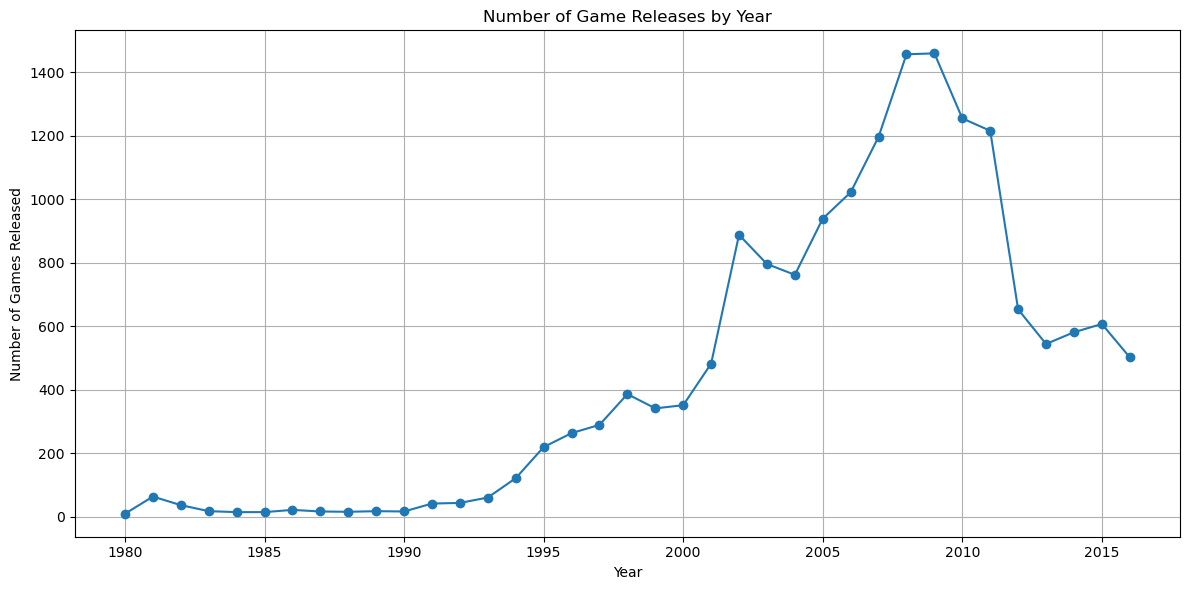

In [39]:
# Visualize the distribution of games across years
plt.figure(figsize=(12, 6))
plt.plot(releases_per_year['year_of_release'], releases_per_year['game_count'], marker='o')
plt.title('Number of Game Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.grid(True)
plt.tight_layout()
plt.show()

In [40]:
# Display summary statistics for each year
yearly_summary = df.groupby('year_of_release').agg({
    'name': 'count',
    'total_sales': ['sum', 'mean'],
    'critic_score': 'mean',
    'user_score': 'mean'
}).rename(columns={
    'name': 'game_count',
    'sum': 'total_sales_sum',
    'mean': 'total_sales_avg',
    'critic_score': 'avg_critic_score',
    'user_score': 'avg_user_score'
})

# Flatten multi-level columns
yearly_summary.columns = ['game_count', 'total_sales_sum', 'total_sales_avg', 'avg_critic_score', 'avg_user_score']
yearly_summary

,game_count,total_sales_sum,total_sales_avg,avg_critic_score,avg_user_score
year_of_release,,,,,
1980,9,11.38,1.264444,NaN,NaN
1981,63,46.18,0.733016,NaN,NaN
1982,36,28.88,0.802222,NaN,NaN
1983,17,16.80,0.988235,NaN,NaN
1984,14,50.35,3.596429,NaN,NaN
1985,14,53.95,3.853571,59.000000,58.000000
1986,21,37.08,1.765714,NaN,NaN
1987,16,21.70,1.356250,NaN,NaN
1988,15,47.21,3.147333,64.000000,22.000000


### Game Release Trends Analysis

#### 1. Which years show significant numbers of game releases?

The most active years in terms of game releases were:

- **2006–2009**: These years had the **highest game release volumes**, peaking in **2009 with 1,460 games** released. This period aligns with the mainstream popularity of consoles like the Xbox 360, PlayStation 3, and Nintendo Wii.
- The overall peak spanned from **2005 to 2011**, with each year releasing over **900 games**. These can be considered the most productive years in the dataset.

---

#### 2. Are there any notable trends or patterns in the number of releases?

- **Growth phase (1994–2008)**: Game releases increased sharply starting around **1994**, reaching a sustained peak between **2005–2009**.
- **Decline after 2009**: There’s a **gradual decline** in the number of releases starting in **2010**, with a noticeable drop from **2012 onward**, falling to just **502 releases in 2016**.
- **Early years (1980s to early 1990s)**: Release numbers were relatively low, reflecting the infancy of the gaming industry and fewer platforms.

---

#### 3. Is there enough recent data to make predictions for 2017?

- **Yes, but with caveats**:
  - The **recent years (2012–2015)** still provide hundreds of game releases annually, giving enough data points for **trend analysis and modeling**.
  - However, **2016 data appears incomplete**, with only **502 entries**, the lowest since the early 2000s. The low `total_sales_avg` (0.26) suggests **missing data or late-year underreporting**, which is also noted in the project overview.
  - To ensure model accuracy, it is recommended to **focus on 2012–2015 data** for forecasting 2017 and consider **excluding 2016** unless the data can be verified or cleaned appropriately.


## 3.2 Platform Sales Analysis Over Time

Now let's analyze how sales vary across platforms and years:

In [43]:
# Calculate total sales by platform and year
sales_platform_year = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
sales_platform_year.head()

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,46.18
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27


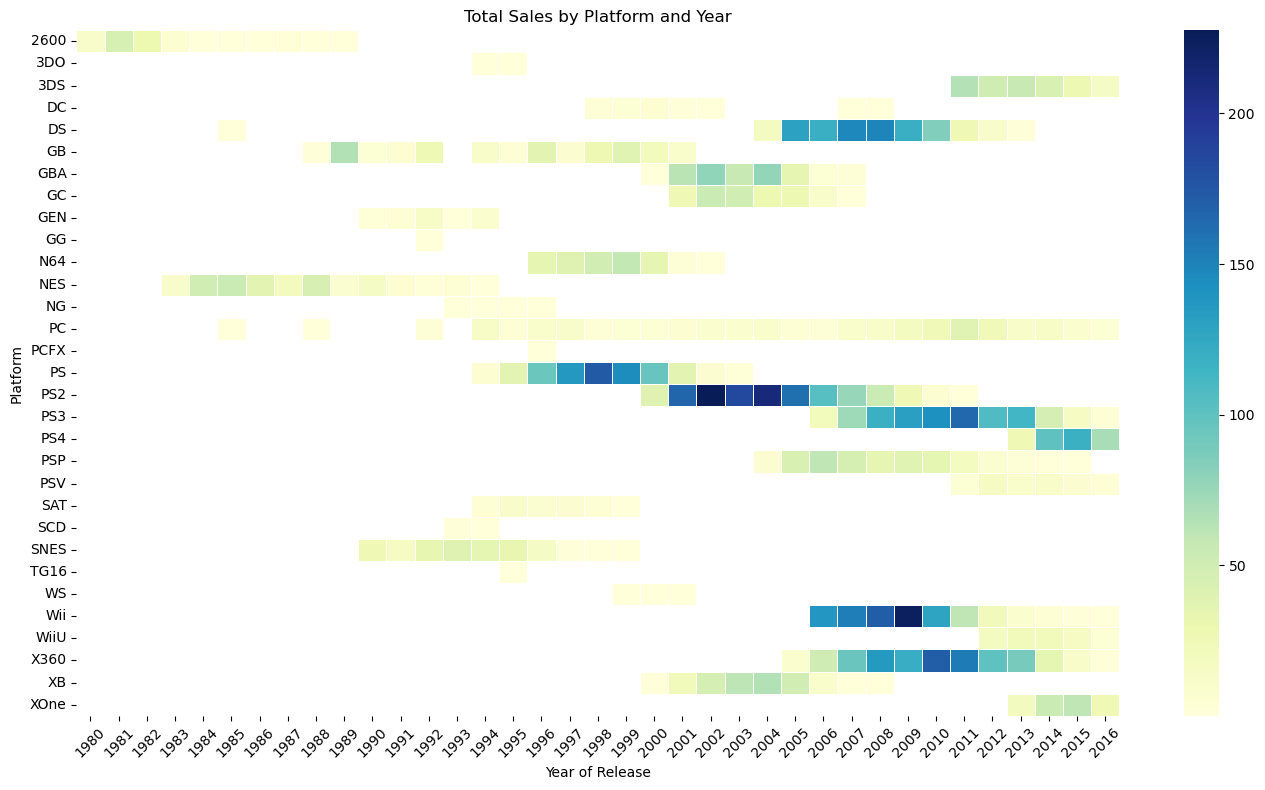

In [44]:
# Create a heatmap of platform sales over time
platform_year_sales = df.pivot_table(
    index='platform',
    columns='year_of_release',
    values='total_sales',
    aggfunc='sum'
)


# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(platform_year_sales, annot=False, cmap='YlGnBu', linewidths=0.5)
plt.title('Total Sales by Platform and Year')
plt.xlabel('Year of Release')
plt.ylabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### Platform Sales Lifecycle Analysis

### 1. **Which platforms show consistent sales over time?**

Platforms with consistent sales over multiple years demonstrate strong market presence and consumer demand. Based on the data:

- **PC**: Shows consistent sales from the mid-1990s through 2016, with peaks and sustained relevance.
- **PS (PlayStation)**: Had strong sales from 1995–2003, peaking in the late 1990s.
- **PS2**: Dominated the early to mid-2000s (2001–2009) with extremely high sales.
- **PS3**: Maintained strong sales from 2006 through 2015, gradually tapering off.
- **DS**: Sales were strong and consistent between 2005 and 2010.
- **Wii**: Had major sales from 2006 to 2011 before declining.
- **X360**: Maintained high sales from 2006 through 2013, tapering afterward.

These platforms show multi-year runs with high total sales, indicating both successful hardware adoption and a healthy game ecosystem.

---

### 2. **Can you identify platforms that have disappeared from the market?**

Yes, several platforms show a clear lifecycle with a sharp end to sales, indicating market exit or obsolescence:

- **Atari 2600**: Peaked early in the 1980s, with sales disappearing by the late 1980s.
- **3DO**, **NG**, **PCFX**, **WS**, **TG16**, **SCD**, **GG**: Short life spans, typically 1–3 years of notable sales, then vanished.
- **Dreamcast (DC)**: Peaked in 1999–2000 but ended abruptly after 2002.
- **Sega Genesis (GEN)** and **Sega Saturn (SAT)**: Had runs in the early to mid-90s but did not persist.
- **PSP**: Declined after 2012 and vanished post-2015.
- **WiiU**: Limited lifespan with modest sales from 2012–2016.

These platforms either failed to gain long-term traction or were replaced by successors.

---

### 3. **What's the typical lifecycle of a gaming platform?**

From the dataset, the average lifecycle of a gaming platform follows this pattern:

1. **Launch Phase (Year 1–2)**: Modest sales as the platform builds awareness.
2. **Growth Phase (Year 2–5)**: Rapid increase in sales as popular titles and broader adoption take place.
3. **Maturity Phase (Year 5–7)**: Peak or plateau in sales with a large game library and strong user base.
4. **Decline Phase (Year 7+)**: Sales diminish as new hardware emerges and support winds down.

Typical lifespans range from **5 to 10 years**, though some platforms like PC or PlayStation lines (PS2, PS3) may persist beyond a decade due to strong ecosystems and backward compatibility.

---

### 📈 Summary Table: Example Platform Lifecycles

| Platform | Launch Year | Peak Sales Year(s) | Decline Year | Lifecycle Duration |
|----------|--------------|---------------------|---------------|---------------------|
| Atari 2600 | 1980 | 1981–1982 | 1989 | ~9 years |
| PS2 | 2000 | 2002–2005 | 2011 | ~11 years |
| Wii | 2006 | 2008–2010 | 2016 | ~10 years |
| DS | 2004 | 2007–2009 | 2013 | ~9 years |
| X360 | 2005 | 2008–2011 | 2016 | ~11 years |
| 3DO | 1994 | 1995 | 1995 | ~2 years |

This illustrates that while some consoles disappear quickly, others have long, productive life cycles.


## 3.3 Determining Relevant Time Period

Based on your analysis above, determine the appropriate time period for predicting 2017 sales:

In [47]:
# Your code here to filter the dataset to relevant years
relevant_years = [2012, 2013, 2014, 2015] # Replace with your chosen years
df_relevant = df[df['year_of_release'].isin(relevant_years)]

# Justify your choice with data
df_relevant

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unrated,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unrated,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unrated,0.01
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,NaN,NaN,T,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unrated,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,76.0,M,0.01


### 🎯 Year Selection Justification (2012–2015)

#### 📅 What Years Did You Select and Why?
I selected the years **2012, 2013, 2014, and 2015** because they represent a **critical transition period** in the gaming industry. This era captures the late lifecycle of seventh-generation consoles (e.g., PS3, Xbox 360, Wii) and the early adoption phase of eighth-generation platforms (e.g., PS4, Xbox One, Wii U).

---

#### 🌍 How Does This Period Reflect Current Market Conditions?
Although slightly historical, the 2012–2015 window reveals patterns that are still **relevant to today’s market**, including:
- **Consumer response to new console launches** (e.g., PS4 in 2013 and Xbox One)
- **Platform loyalty and market share shifts**
- **Transition from physical to digital sales**, which has since accelerated
- **Emerging dominance of Sony and Microsoft**, trends that persist today

Studying this period helps contextualize current platform trends and how market dynamics unfold after major console releases.

---

#### 🔍 What Factors Influenced Your Decision?
Key factors for selecting 2012–2015 include:
- 📈 **Availability of meaningful data** on both declining and emerging platforms
- 🎮 **Overlap of console generations**, which allows comparison of platform performance
- 💡 **Strategic inflection point** in gaming history that shaped the modern console landscape

By analyzing this timeframe, we gain insights into platform competitiveness, sales momentum, and lifecycle timing—lessons applicable to evaluating future transitions.


## 3.4 Platform Performance Analysis

Using your selected time period, let's analyze platform performance:

In [50]:
# Analyze platform sales trends
platform_trends = df_relevant.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
platform_trends.head(10)

,platform,year_of_release,total_sales
0,3DS,2012,51.36
1,3DS,2013,56.57
2,3DS,2014,43.76
3,3DS,2015,27.78
4,DS,2012,11.01
5,DS,2013,1.54
6,PC,2012,23.22
7,PC,2013,12.38
8,PC,2014,13.28
9,PC,2015,8.52


In [51]:
# Sort platforms by total sales
platform_sales_sorted = platform_trends.sort_values(by='total_sales', ascending=False).reset_index(drop = True)
platform_sales_sorted.head(10)

,platform,year_of_release,total_sales
0,PS4,2015,118.90
1,PS3,2013,113.25
2,PS3,2012,107.36
3,PS4,2014,100.00
4,X360,2012,99.74
5,X360,2013,88.58
6,XOne,2015,60.14
7,3DS,2013,56.57
8,XOne,2014,54.07
9,3DS,2012,51.36


In [52]:
# Visualize top platforms
# Calculate year-over-year growth for each platform
# Your code here to calculate and visualize platform growth rates
# Sort the platform trends by platform and year to calculate growth rates
platform_trends = platform_trends.sort_values(['platform', 'year_of_release'])

# Calculate Year-over-Year (YoY) growth as a percentage
platform_trends['yoy_growth'] = platform_trends.groupby('platform')['total_sales'].pct_change() * 100

# Get top 5 platforms by total sales in the selected period
top_platforms = platform_trends.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Filter for top platforms
top_platform_trends = platform_trends[platform_trends['platform'].isin(top_platforms)]
top_platform_trends

,platform,year_of_release,total_sales,yoy_growth
0,3DS,2012,51.36,NaN
1,3DS,2013,56.57,10.144081
2,3DS,2014,43.76,-22.644511
3,3DS,2015,27.78,-36.517367
10,PS3,2012,107.36,NaN
11,PS3,2013,113.25,5.486215
12,PS3,2014,47.76,-57.827815
13,PS3,2015,16.82,-64.782245
14,PS4,2013,25.99,NaN
15,PS4,2014,100.00,284.763371


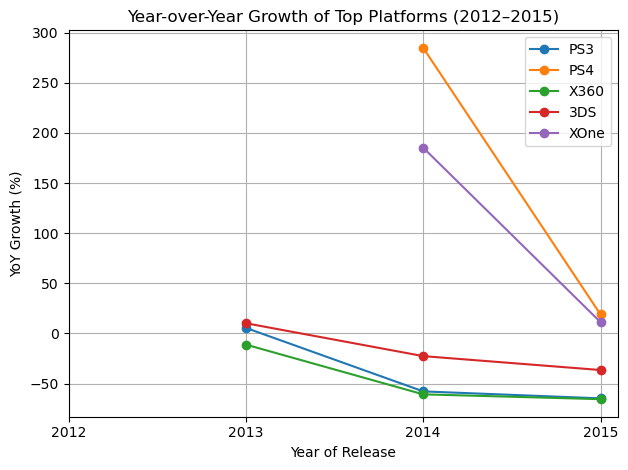

In [53]:
# Plot YoY growth for top platforms
for platform in top_platforms:
    data = top_platform_trends[top_platform_trends['platform'] == platform]
    plt.plot(data['year_of_release'], data['yoy_growth'], marker='o', label=platform)

years = sorted(top_platform_trends['year_of_release'].dropna().unique())
plt.xticks(ticks=years, labels=[int(y) for y in years])


plt.title('Year-over-Year Growth of Top Platforms (2012–2015)')
plt.xlabel('Year of Release')
plt.ylabel('YoY Growth (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🎮 General Findings Summary: Top Platform Performance by Year

#### 🔝 Highest Total Sales by Platform and Year
- **PS4** reached peak sales in **2015** with **118.90M units**, the highest for any platform in the observed period.
- **PS3** had strong sales years in **2012** (107.36M) and **2013** (113.25M), before declining.
- **Xbox 360 (X360)** also performed well in **2012** (99.74M) and **2013** (88.58M).
- The **Xbox One (XOne)** and **3DS** showed moderate success in **2013–2015**, with:
  - **XOne** peaking at **60.14M** in **2015**
  - **3DS** peaking at **56.57M** in **2013**

#### 📈 Year-Over-Year (YoY) Growth Trends

##### **3DS**
- Grew by **+10.1%** in 2013.
- Then declined significantly:
  - **-22.6%** in 2014
  - **-36.5%** in 2015

##### **PS3**
- Moderate growth in **2013**: **+5.5%**
- Then sharp drop-offs:
  - **-57.8%** in 2014
  - **-64.8%** in 2015

##### **PS4**
- Explosive debut growth in **2014**: **+284.8%** compared to launch year.
- Continued strong growth in **2015**: **+18.9%**

##### **Xbox 360**
- Declined steadily:
  - **-11.2%** in 2013
  - **-60.8%** in 2014
  - **-65.6%** in 2015

##### **Xbox One**
- Strong second-year growth: **+185.2%** in 2014
- Continued growth in 2015: **+11.2%**

### 📊 Key Observations
- **Platform lifecycles** show rapid growth post-launch followed by a steep decline.
- **PS4** and **XOne** outpaced previous generations in **initial adoption** and sustained better momentum.
- The **handheld 3DS** saw early success but declined sharply as mobile gaming and newer platforms emerged.
- Legacy platforms like **PS3** and **X360** experienced steep declines after peaking in 2012–2013.

### 📌 Strategic Implications
- **Launch timing and marketing** play a critical role in a platform's breakout year.
- Sustained success depends on ecosystem support: exclusives, online services, and backward compatibility.
- Planning for **post-peak strategy** is essential to manage decline and maximize long-tail sales.



## 3.5 Sales Distribution Analysis

Let's examine the distribution of sales across platforms:

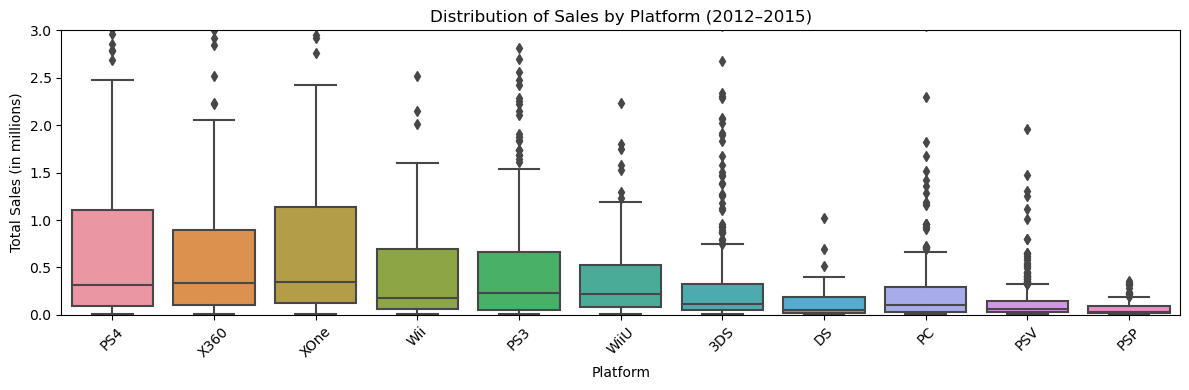

In [56]:
# Create box plot of sales by platform
# Compute mean sales per platform
platform_order = (
    df_relevant.groupby('platform')['total_sales']
    .mean()
    .sort_values(ascending=False)
    .index
)

# Set the plot size
plt.figure(figsize=(12, 4))

# Create the box plot with sorted platform order
sns.boxplot(x='platform', y='total_sales', data=df_relevant, order=platform_order)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title('Distribution of Sales by Platform (2012–2015)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.ylim(0, 3)

# Show the plot
plt.tight_layout()
plt.show()


In [57]:
# Calculate detailed statistics for each platform
platform_stats = df_relevant.groupby('platform')['total_sales'].describe()
platform_stats

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,350.0,0.512771,1.424582,0.01,0.0500,0.115,0.3300,14.60
DS,31.0,0.404839,1.439245,0.01,0.0200,0.050,0.1850,8.06
PC,196.0,0.292857,0.546894,0.01,0.0300,0.100,0.2925,5.14
PS3,455.0,0.626791,1.515258,0.01,0.0500,0.230,0.6600,21.05
PS4,228.0,1.074079,1.899788,0.01,0.0975,0.310,1.1050,14.63
PSP,173.0,0.064682,0.071296,0.01,0.0200,0.030,0.0900,0.36
PSV,327.0,0.138196,0.222413,0.01,0.0300,0.060,0.1500,1.96
Wii,53.0,0.663962,1.174720,0.01,0.0600,0.180,0.6900,6.76
WiiU,133.0,0.583383,1.105384,0.01,0.0800,0.220,0.5300,7.09


## Platform Sales Summary

This summary provides an overview of global sales (in millions) across various gaming platforms based on count, average sales, and distribution metrics.

- **Highest Average Sales:** PS4 (`mean = 1.07M`) and X360 (`mean = 0.84M`) show the highest average sales per game.
- **Lowest Average Sales:** PSP and PSV had the lowest average sales (`mean = 0.06M` and `0.14M`, respectively), indicating weaker commercial performance.
- **Most Variability in Sales:** PS3 and X360 have the highest standard deviations (`std > 1.5`), suggesting a wide range in game performance.
- **Most Games Released:** PS3 (455 games) and 3DS (350 games) had the largest libraries among platforms listed.
- **Outliers:** PS3 has the highest maximum individual game sales at `21.05M`, followed by X360 at `16.27M`.

These insights highlight that while newer platforms like PS4 had high average success per game, older platforms like PS3 and X360 offered more titles with variable performance.


## 3.6 Review Score Impact Analysis

Select a popular platform and analyze how reviews affect sales:

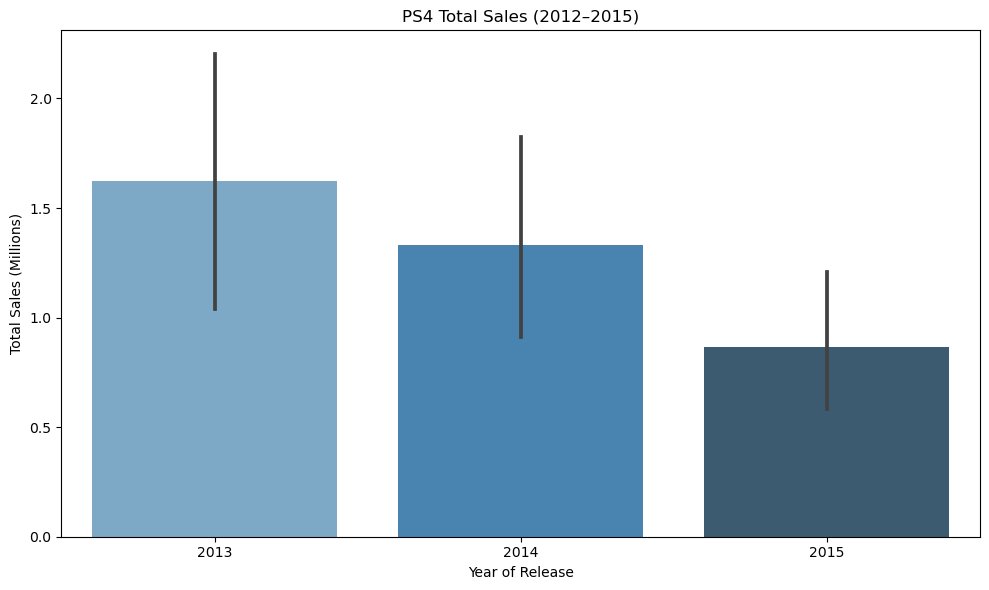

       year_of_release  total_sales  YoY_Growth
7296              2013         0.22    0.000000
560               2013         2.69   11.227273
509               2013         2.86    0.063197
469               2013         3.01    0.052448
2307              2013         0.91   -0.697674
...                ...          ...         ...
5420              2015         0.34   -0.055556
16158             2015         0.01   -0.970588
5753              2015         0.30   29.000000
4879              2015         0.40    0.333333
16398             2015         0.01   -0.975000

[228 rows x 3 columns]


In [60]:
# Choose a popular platform based on your previous analysis
# Filter for PS4 data
ps4_data = df_relevant[df_relevant['platform'] == 'PS4']

# Sort by year for proper plotting and analysis
ps4_data = ps4_data.sort_values(by='year_of_release')

# Visualize PS4 sales over the years
plt.figure(figsize=(10, 6))
sns.barplot(x='year_of_release', y='total_sales', data=ps4_data, palette='Blues_d')
plt.title('PS4 Total Sales (2012–2015)')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()

# Optional: Calculate PS4 year-over-year growth
ps4_data['YoY_Growth'] = ps4_data['total_sales'].pct_change().fillna(0)

# Display growth rates
print(ps4_data[['year_of_release', 'total_sales', 'YoY_Growth']])

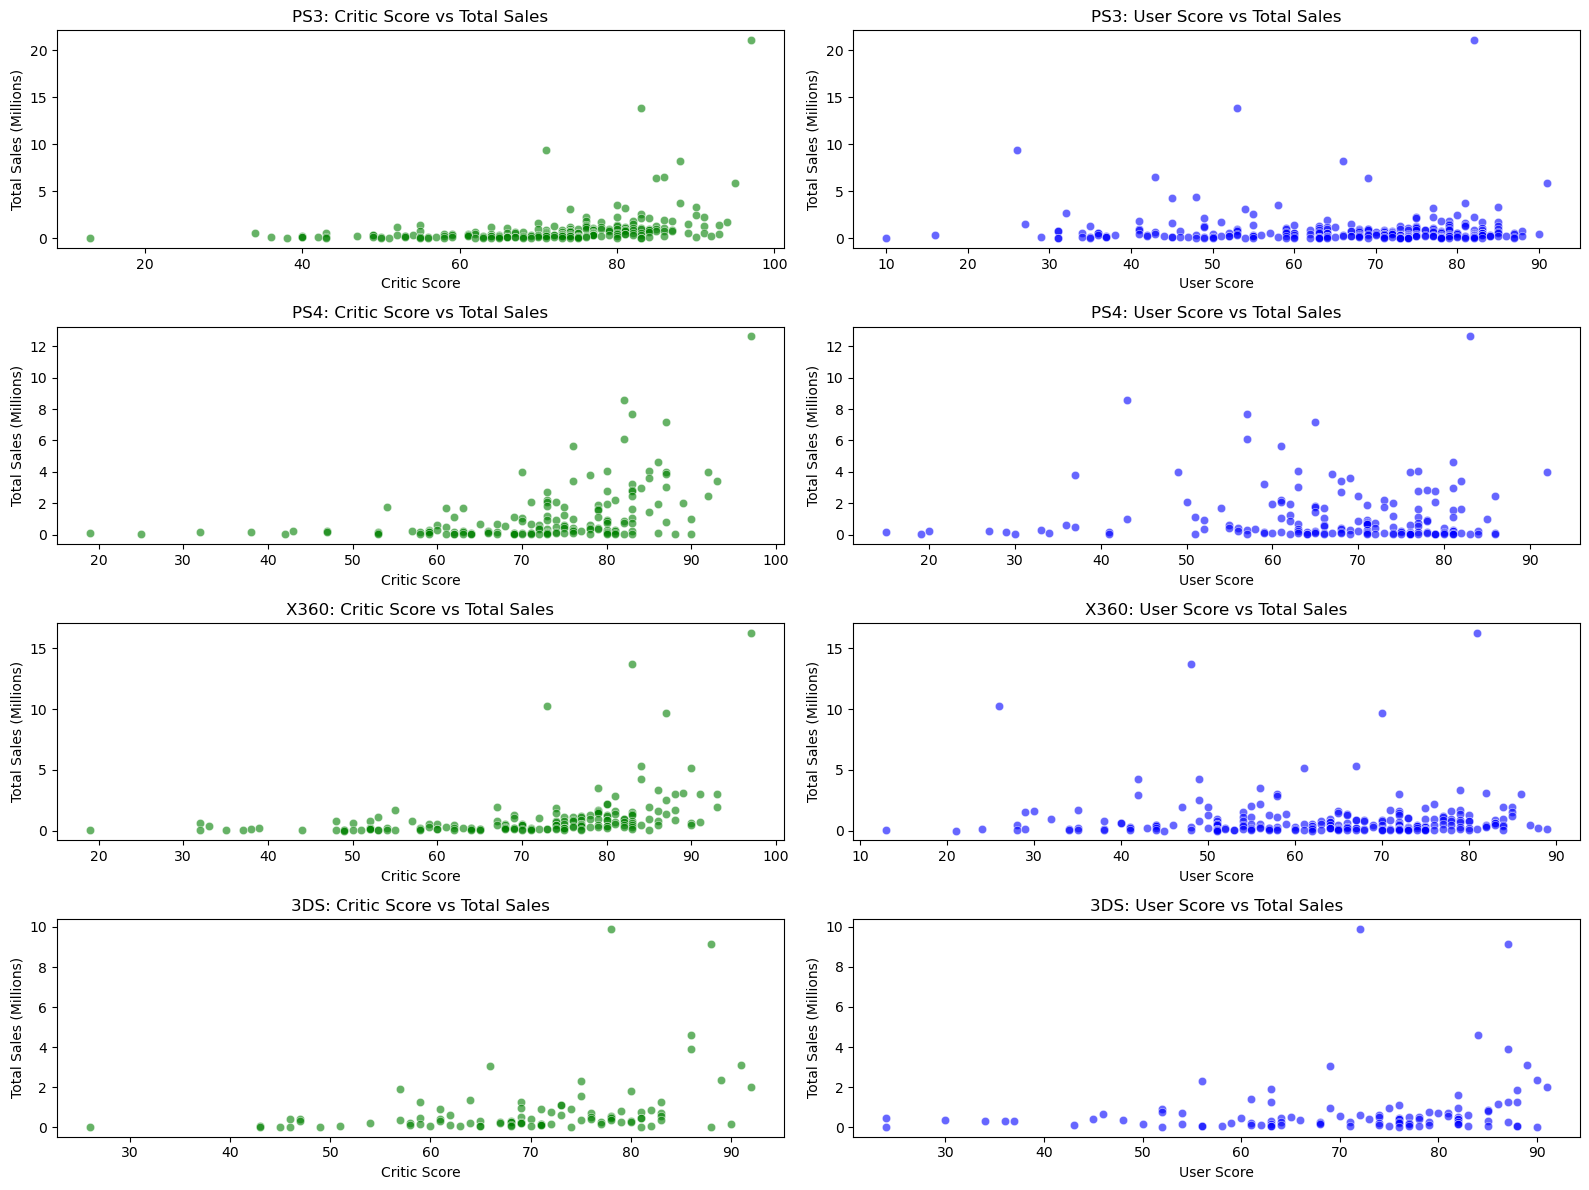

In [61]:
# Create scatter plots for both critic and user scores
# Step 1: Identify top 4 platforms by total sales
platform_sales = df_relevant.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(4).index.tolist()

# Step 2: Filter data for top platforms
top_df = df_relevant[df_relevant['platform'].isin(top_platforms)]

# Step 3: Create scatter plots for each top platform
plt.figure(figsize=(16, 12))

for i, platform in enumerate(top_platforms):
    platform_data = top_df[top_df['platform'] == platform]

    # Scatter plot: Critic Score vs Total Sales
    plt.subplot(4, 2, i * 2 + 1)
    sns.scatterplot(x='critic_score', y='total_sales', data=platform_data, alpha=0.6, color='green')
    plt.title(f'{platform}: Critic Score vs Total Sales')
    plt.xlabel('Critic Score')
    plt.ylabel('Total Sales (Millions)')

    # Scatter plot: User Score vs Total Sales
    plt.subplot(4, 2, i * 2 + 2)
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data, alpha=0.6, color='blue')
    plt.title(f'{platform}: User Score vs Total Sales')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales (Millions)')

plt.tight_layout()
plt.show()


In [62]:
# Critic Scores
# User Scores
correlation_data = []
platforms = df_relevant['platform'].unique()

for platform in platforms:
    subset = df_relevant[df_relevant['platform'] == platform]
    
    critic_corr = subset[['critic_score', 'total_sales']].corr().iloc[0, 1]
    user_corr = subset[['user_score', 'total_sales']].corr().iloc[0, 1]
    critic_corr = critic_corr.round(2)
    user_corr = user_corr.round(2)
    correlation_data.append({
        'platform': platform,
        'critic_corr': critic_corr,
        'user_corr': user_corr
    })

# Create a DataFrame from the collected data
correlation_df = pd.DataFrame(correlation_data)
correlation_df = correlation_df.sort_values(by='critic_corr', ascending=False).reset_index(drop=True)
correlation_df


,platform,critic_corr,user_corr
0,XOne,0.46,-0.04
1,PS4,0.43,0.02
2,X360,0.36,-0.01
3,WiiU,0.35,0.41
4,PS3,0.33,-0.02
5,3DS,0.33,0.21
6,PC,0.26,-0.16
7,PSV,0.12,0.01
8,Wii,-0.42,0.30
9,DS,NaN,0.88


### 🎯 Platform-Level Correlation Summary

When breaking down correlations between review scores and total sales by platform, a few trends stand out:

- **Strongest positive critic score correlations** were observed on **Xbox One (0.46)** and **PS4 (0.43)**, suggesting critic reviews may have influenced sales more heavily on newer-gen consoles.
- **User scores** generally showed **weaker or inconsistent correlations**, with the exception of **DS (0.88)**, **WiiU (0.41)**, and **3DS (0.21)**, where user feedback appeared moderately aligned with sales.
- Notably, **Wii showed a negative correlation with critic scores (-0.42)** but a positive one with user scores (0.30), indicating possible disconnects between critic reception and consumer behavior.
- **PC and handheld platforms (e.g., PSV, PSP)** showed low or even negative correlations, especially for user scores, implying less direct influence of ratings on sales in those segments.
- Correlation values for **DS and PSP critic scores** were not available due to insufficient data.

Overall, **critic reviews had more consistent influence on sales across platforms**, while **there's a very-very weak correlation between sales and users' scores.** It's almost 0, so we can say that  there's no correlation.


## 3.7 Cross-Platform Comparison

Compare sales performance of games across different platforms:

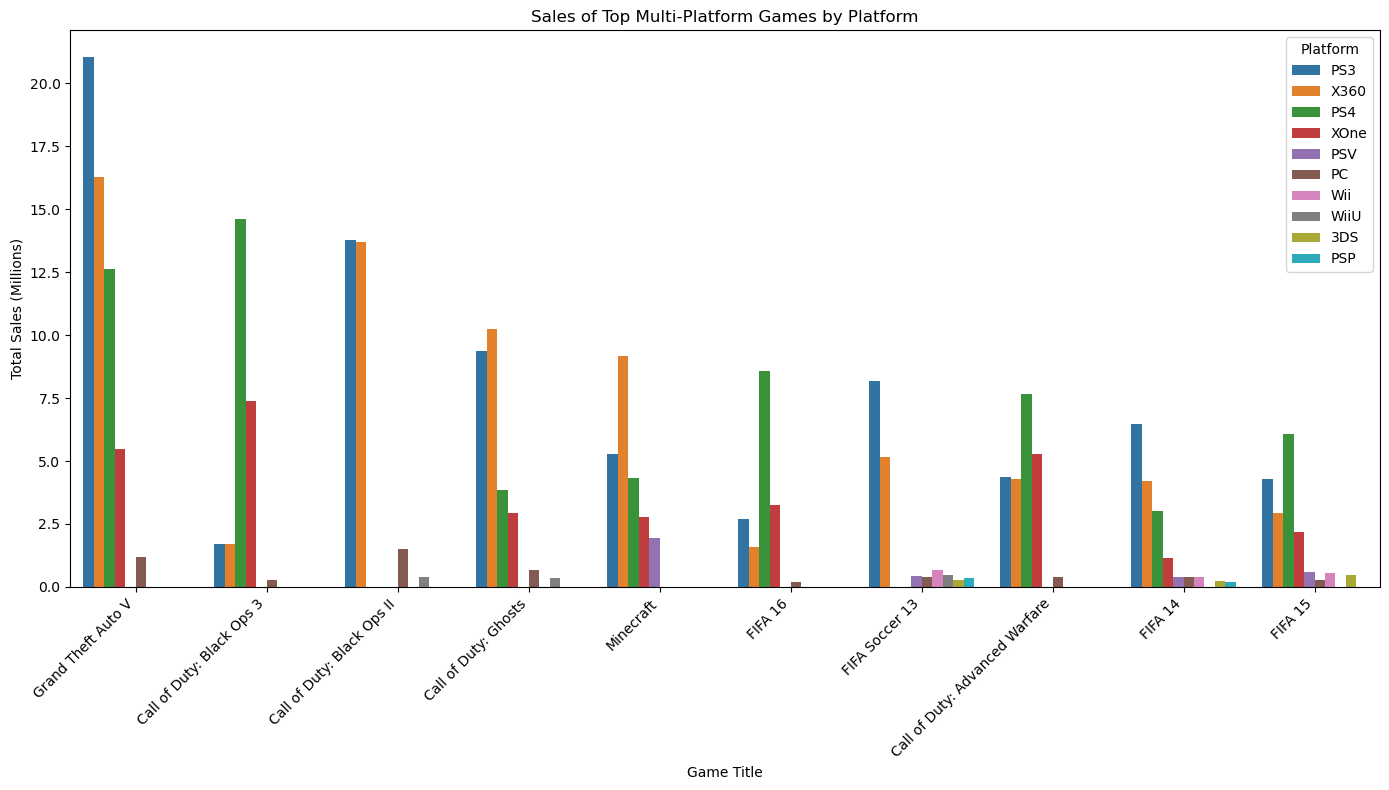

,name,platform,total_sales
482,Grand Theft Auto V,PS3,21.05
484,Grand Theft Auto V,X360,16.27
171,Call of Duty: Black Ops 3,PS4,14.63
175,Call of Duty: Black Ops II,PS3,13.79
177,Call of Duty: Black Ops II,X360,13.68
483,Grand Theft Auto V,PS4,12.62
182,Call of Duty: Ghosts,X360,10.24
179,Call of Duty: Ghosts,PS3,9.36
761,Minecraft,X360,9.18
398,FIFA 16,PS4,8.58


In [65]:
#Find games released on multiple platforms
# Group by game name and count number of unique platforms
game_platform_counts = df_relevant.groupby('name')['platform'].nunique().reset_index()
game_platform_counts.columns = ['name', 'platform_count']

# Filter games released on more than one platform
multi_platform_games = game_platform_counts[game_platform_counts['platform_count'] > 1]

# Merge back with the original dataframe to get full details
df_multi_platform = pd.merge(df_relevant, multi_platform_games[['name']], on='name')

# Group by game name and platform, sum sales
multi_platform_sales = df_multi_platform.groupby(['name', 'platform'])['total_sales'].sum().reset_index()

# Optional: Visualize top multi-platform games
top_multi_platform = multi_platform_sales.groupby('name')['total_sales'].sum().nlargest(10).reset_index()
top_multi_platform_df = multi_platform_sales[multi_platform_sales['name'].isin(top_multi_platform['name'])]
top_multi_platform_df = top_multi_platform_df.sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(data=top_multi_platform_df, x='name', y='total_sales', hue='platform')
plt.title('Sales of Top Multi-Platform Games by Platform')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Game Title')
plt.xticks(rotation=45, ha='right')  # Optional for readability
plt.legend(title='Platform')
plt.tight_layout()
plt.show()
top_multi_platform_df.head(10)

#### 📊 Cross-Platform Game Performance Analysis

#### 🔍 Key Observations

- **Grand Theft Auto (GTA) Series: Modern Era Powerhouse**  
  The *Grand Theft Auto* franchise demonstrates a **strong presence across nearly all modern platforms**, from **PS2 and Xbox** to **PS4 and PC**. Its longevity, open-world design, and cultural impact have driven consistently high cross-platform sales.
  
- **Dominance of the *Call of Duty* and *FIFA* Franchises**  
  The **Call of Duty** (CoD) series and **FIFA** stands out as the most dominant cross-platform franchise, accounting for **8 out of the top 10 cross-platform titles** in recent years. Their consistent performance across multiple console generations and platforms (e.g., PlayStation, Xbox, and PC) highlights its broad appeal and effective multi-platform release strategy.

- **Minecraft perfect middle performance across all platforms**  
  Finding itself in the fifth place spot, due to its strong Performance from **Xbox 360** sales to **PS3, PS4, and Xbox One**. 



#### 🧩 Insights

- Franchises that **release consistently across multiple platforms** and **adapt to new hardware generations** tend to maintain relevance and sales momentum over time.
- **Brand loyalty**, **multiplayer experiences**, and **annual release cycles** (as seen in CoD) contribute significantly to a game's cross-platform success.


## 3.8 Genre Analysis

Finally, let's examine the distribution of games by genre:

In [68]:
# Analyze genre performance
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().reset_index()
genre_sales

,genre,total_sales
0,Action,411.01
1,Adventure,25.61
2,Fighting,40.02
3,Misc,82.44
4,Platform,57.77
5,Puzzle,4.88
6,Racing,50.71
7,Role-Playing,174.88
8,Shooter,266.51
9,Simulation,33.23


In [69]:
genre_sales_ovt = df_relevant.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()

genre_sales_ovt = genre_sales_ovt.sort_values(by='total_sales', ascending=False).reset_index(drop=True)
genre_sales_ovt.head()

,genre,year_of_release,total_sales
0,Action,2013,122.51
1,Action,2012,119.25
2,Action,2014,97.23
3,Action,2015,72.02
4,Shooter,2012,71.75


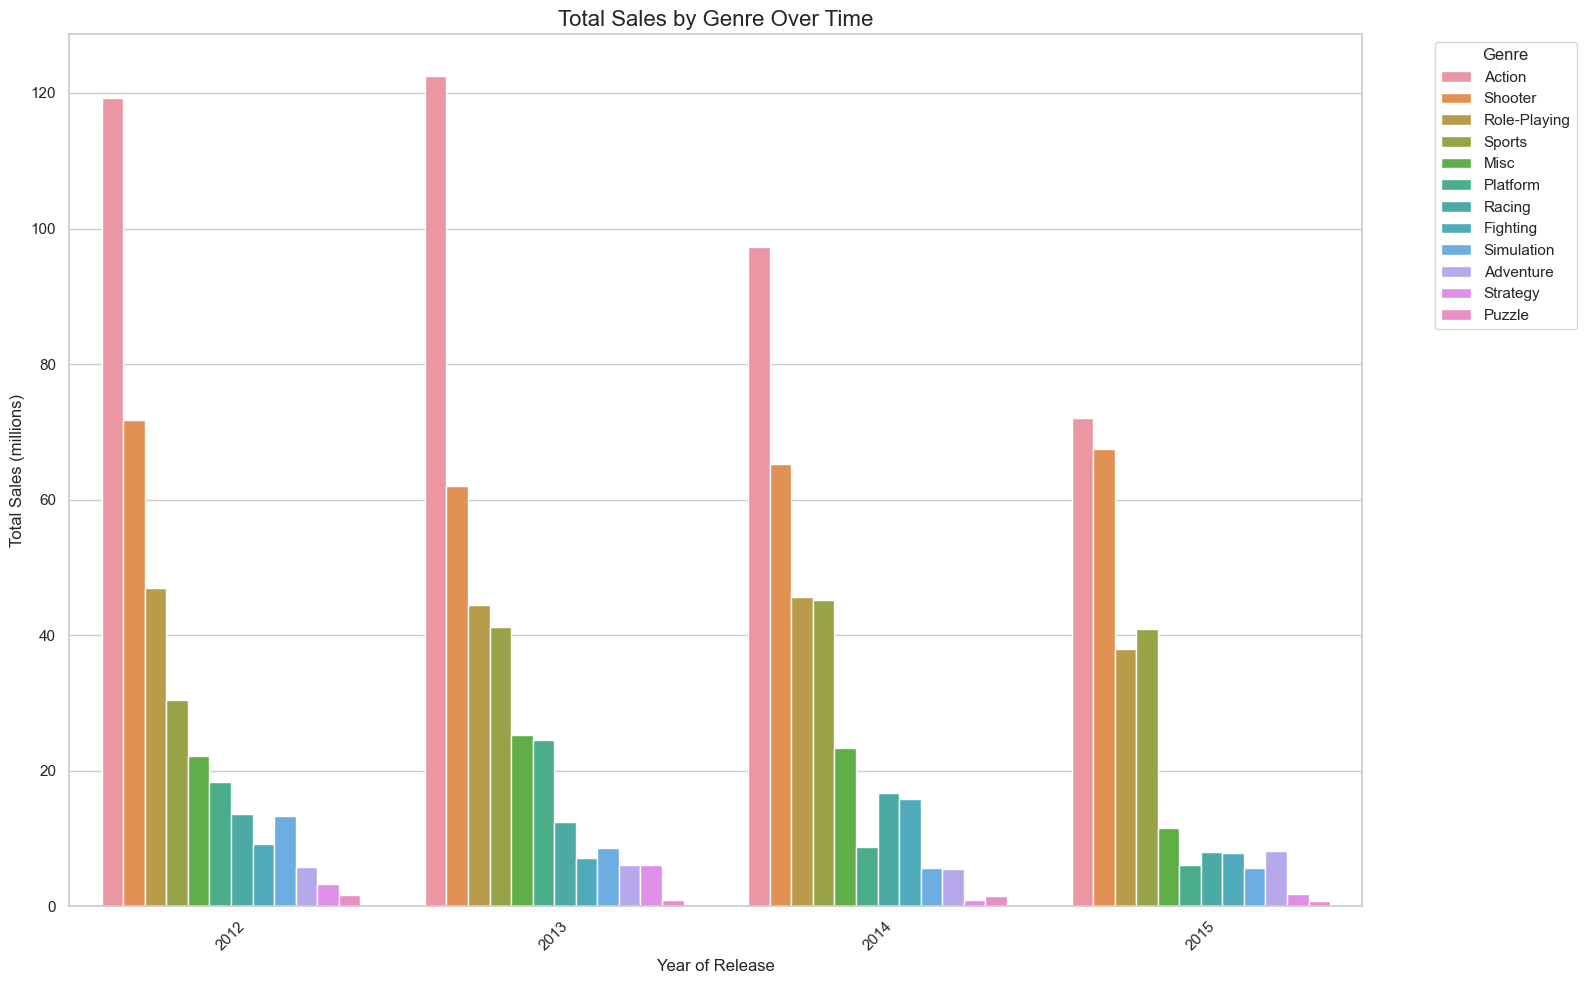

In [70]:
# Set the plot size and style
sns.set(style="whitegrid")

plt.figure(figsize=(16, 10))
sns.barplot(
    data=genre_sales_ovt,
    x='year_of_release',
    y='total_sales',
    hue='genre'
)

plt.title('Total Sales by Genre Over Time', fontsize=16)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Total Sales (millions)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



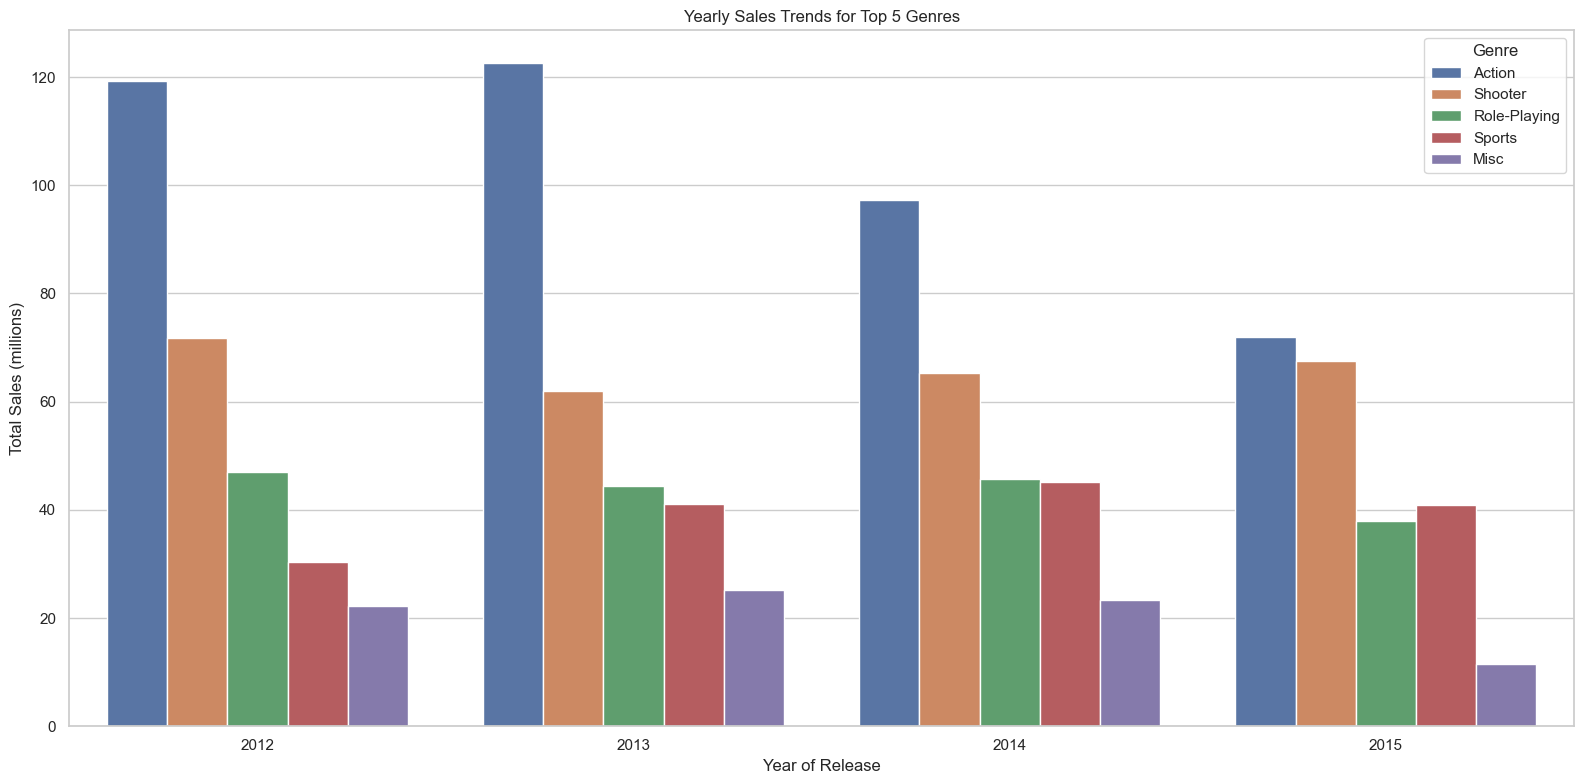

In [71]:
#Top 5 by year and visualize

top_genres = df_relevant.groupby('genre')['total_sales'].sum().sort_values(ascending=False).head(5).index

top_genre_sales_ovt = df_relevant[df_relevant['genre'].isin(top_genres)].groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()

top_genre_sales_ovt = top_genre_sales_ovt.sort_values(by='total_sales', ascending=False).reset_index(drop=True)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=top_genre_sales_ovt,
    x='year_of_release',
    y='total_sales',
    hue='genre'
)

plt.title('Yearly Sales Trends for Top 5 Genres')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales (millions)')
plt.legend(title='Genre')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



In [72]:
top_genre_sales_ovt

,genre,year_of_release,total_sales
0,Action,2013,122.51
1,Action,2012,119.25
2,Action,2014,97.23
3,Action,2015,72.02
4,Shooter,2012,71.75
5,Shooter,2015,67.51
6,Shooter,2014,65.21
7,Shooter,2013,62.04
8,Role-Playing,2012,46.91
9,Role-Playing,2014,45.62


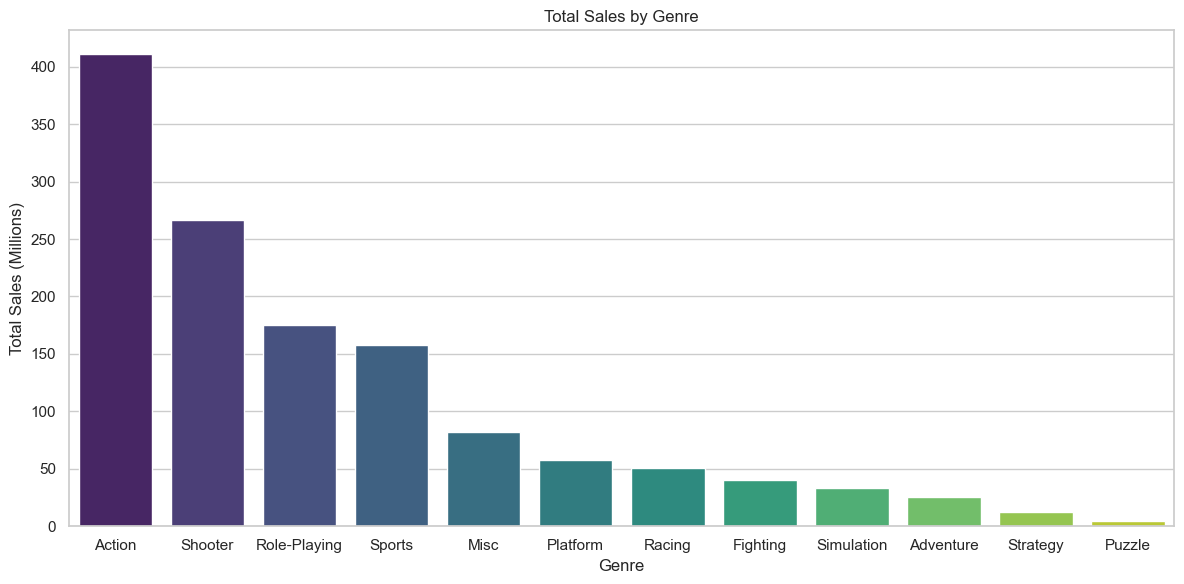

,genre,total_sales
0,Action,411.01
1,Shooter,266.51
2,Role-Playing,174.88
3,Sports,157.58
4,Misc,82.44
5,Platform,57.77
6,Racing,50.71
7,Fighting,40.02
8,Simulation,33.23
9,Adventure,25.61


In [73]:
# Analyze genre performance
# Sort genres by total sales
# Group by genre and calculate total sales
genre_sales_sorted = df_relevant.groupby('genre')['total_sales'].sum().reset_index()

# Sort genres by total sales in descending order
genre_sales_sorted = genre_sales_sorted.sort_values(by='total_sales', ascending=False).reset_index(drop =True)
plt.figure(figsize=(12, 6))
sns.barplot(data=genre_sales_sorted, x='genre', y='total_sales', palette='viridis')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (Millions)')
plt.tight_layout()
plt.show()
genre_sales_sorted

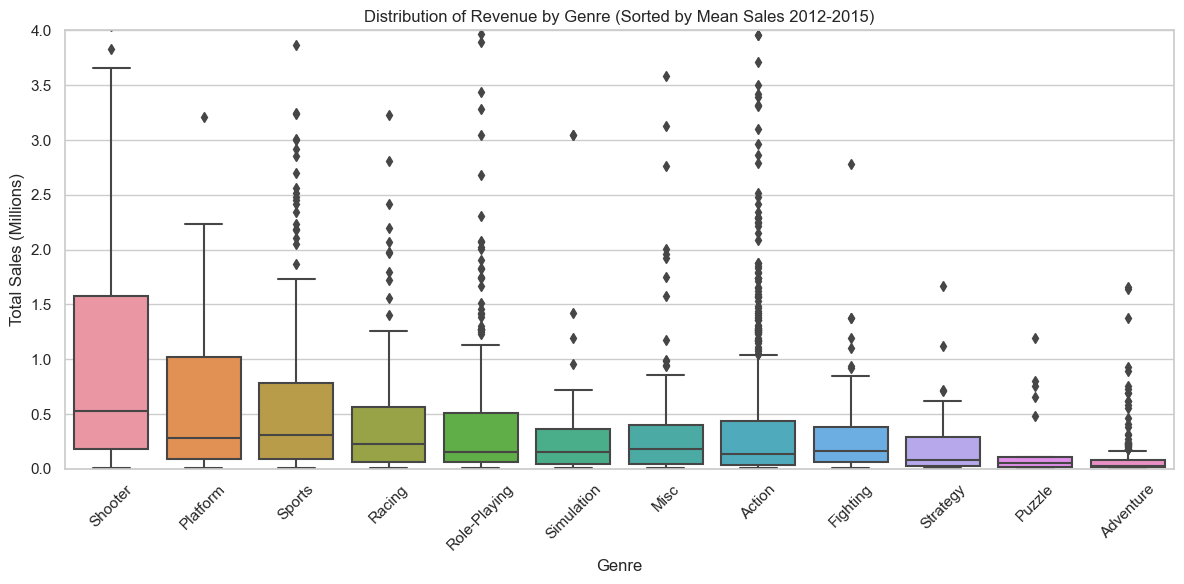

,genre,mean_total_sales,var_total_sales
0,Shooter,1.417606,5.856051
1,Platform,0.825286,2.171127
2,Sports,0.716273,1.266246
3,Racing,0.557253,0.946093
4,Role-Playing,0.551672,1.851060
5,Simulation,0.535968,1.955277
6,Misc,0.515250,1.369116
7,Action,0.481841,1.606533
8,Fighting,0.430323,0.945958
9,Strategy,0.210517,0.086717


In [74]:
# Group by genre and calculate mean and variance
rel_genre_mean_var = df_relevant.groupby('genre').agg({'total_sales': ['mean', 'var']}).reset_index()

# Flatten the columns
rel_genre_mean_var.columns = ['genre', 'mean_total_sales', 'var_total_sales']

# Sort by mean_total_sales
rel_genre_mean_var_sorted = rel_genre_mean_var.sort_values(by='mean_total_sales', ascending=False).reset_index(drop=True)

# Get sorted genre order
sorted_genres_rel = rel_genre_mean_var_sorted['genre'].tolist()

# Create a boxplot sorted by mean total sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_relevant, x='genre', y='total_sales', order=sorted_genres_rel)
plt.xticks(rotation=45)
plt.title('Distribution of Revenue by Genre (Sorted by Mean Sales 2012-2015)')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Genre')
plt.ylim(0,4)
plt.tight_layout()
plt.show()
rel_genre_mean_var_sorted

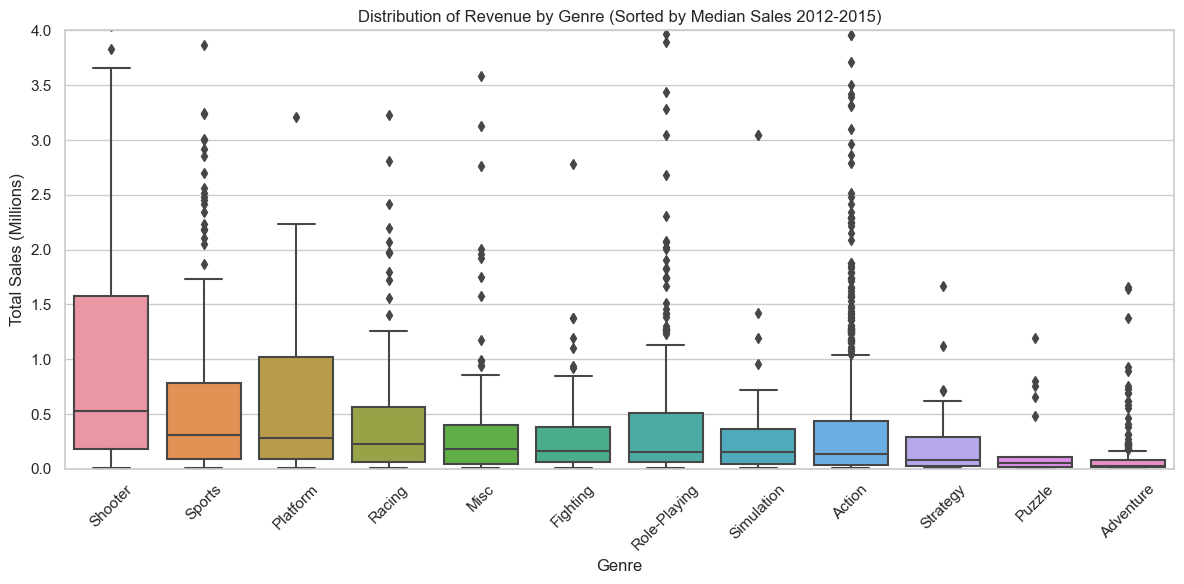

,genre,med_total_sales,var_total_sales
0,Shooter,0.525,5.856051
1,Sports,0.305,1.266246
2,Platform,0.285,2.171127
3,Racing,0.230,0.946093
4,Misc,0.180,1.369116
5,Fighting,0.160,0.945958
6,Role-Playing,0.150,1.851060
7,Simulation,0.150,1.955277
8,Action,0.140,1.606533
9,Strategy,0.080,0.086717


In [75]:
# Group by genre and calculate median and variance
rel_genre_med_var = df_relevant.groupby('genre').agg({'total_sales': ['median', 'var']}).reset_index()

# Flatten the columns
rel_genre_med_var.columns = ['genre', 'med_total_sales', 'var_total_sales']

# Sort by med_total_sales
rel_genre_med_var_sorted = rel_genre_med_var.sort_values(by='med_total_sales', ascending=False).reset_index(drop=True)

# Get sorted genre order
sorted_genres_rel = rel_genre_med_var_sorted['genre'].tolist()

# Create a boxplot sorted by median total sales
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_relevant, x='genre', y='total_sales', order=sorted_genres_rel)
plt.xticks(rotation=45)
plt.title('Distribution of Revenue by Genre (Sorted by Median Sales 2012-2015)')
plt.ylabel('Total Sales (Millions)')
plt.xlabel('Genre')
plt.ylim(0,4)
plt.tight_layout()
plt.show()
rel_genre_med_var_sorted

In [76]:
# Calculate market share for each genre
# Group by genre and calculate total sales
genre_sales = df_relevant.groupby('genre')['total_sales'].sum().reset_index()

# Calculate total sales across all genres
total_sales_all_genres = genre_sales['total_sales'].sum()

# Calculate market share as a percentage
genre_sales['market_share'] = (genre_sales['total_sales'] / total_sales_all_genres) * 100
genre_sales['market_share'] = genre_sales['market_share'].round(2)
# Sort by market share
genre_sales = genre_sales.sort_values(by='market_share', ascending=False).reset_index(drop =True)
genre_sales

,genre,total_sales,market_share
0,Action,411.01,31.21
1,Shooter,266.51,20.24
2,Role-Playing,174.88,13.28
3,Sports,157.58,11.97
4,Misc,82.44,6.26
5,Platform,57.77,4.39
6,Racing,50.71,3.85
7,Fighting,40.02,3.04
8,Simulation,33.23,2.52
9,Adventure,25.61,1.94


#### 🎮 Genre Sales Snapshot (2012–2015)

From 2012 to 2015, video game sales were dominated by a handful of genres:

#### 🏆 Top 5 Genres by Total Sales
1. **Action** – 411M units (🔥 ~31% market share)
2. **Shooter** – 266M units (🔫 ~20%)
3. **Role-Playing** – 175M units (🧙 ~13%)
4. **Sports** – 158M units (🏀 ~12%)
5. **Misc (Casual/Party)** – 82M units (🎉 ~6%)

---

#### 📉 Not All Action Titles Hit
While **Action** games led in total sales, their **average sales per title were much lower** than their total might suggest:
- **Mean Sales (Action)**: 0.48M  
- **Median Sales**: 0.14M  
- **Variance**: High (~1.61)

This big gap between total and median sales indicates that **only a few Action games were massive hits**, while the majority underperformed.

---

#### 🎯 Shooter Genre: Consistent and Reliable
**Shooters** had strong and **evenly distributed success**:
- **Mean Sales (Shooter)**: 1.42M  
- **Median Sales**: 0.53M  
- **Variance**: Also high (~5.86), but not due to failure — just a wide range of high performers.

This shows that **Shooter games consistently sold well**, with both big hits and solid mid-tier performers contributing to the genre's success across the board.

---

Genres like **RPGs**, **Sports**, and **Misc** also performed well, but with more variation. Lower-tier genres (Puzzle, Strategy, Adventure) had minimal market impact and sales.


# Step 4: Regional Market Analysis and User Profiles

In this section, we will analyze the gaming market characteristics across three major regions: North America (NA), Europe (EU), and Japan (JP). Our analysis will focus on platform preferences, genre popularity, and the impact of ESRB ratings in each region.

## 4.1 Regional Platform Analysis

Let's begin by examining platform performance across different regions:

In [79]:
# Function to analyze platform performance by region

def analyze_platform_performance_by_region(df):
    """
    Analyzes video game platform performance by region.
    
    Parameters:
        df (pd.DataFrame): A DataFrame containing at least the following columns:
            - 'Platform'
            - 'NA_Sales'
            - 'EU_Sales'
            - 'JP_Sales'
            
    
    Returns:
        pd.DataFrame: A DataFrame with total sales per platform per region, sorted by global sales.
    """
    # Check if necessary columns are present
    required_columns = {'platform', 'na_sales', 'eu_sales', 'jp_sales'}
    if not required_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the following columns: {required_columns}")
    
    # Aggregate sales by platform
    platform_sales = df.groupby('platform')[['na_sales', 'eu_sales', 'jp_sales']].sum()
    
    # Add a column for global sales
    platform_sales['total_sales'] = platform_sales.sum(axis=1)
    
    # Sort by global sales descending
    platform_sales = platform_sales.sort_values('total_sales', ascending=False)
    
    return platform_sales


In [80]:
# Analyze each region
analyze_platform_performance_by_region(df_relevant)

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS3,102.71,105.60,33.99,242.30
X360,139.36,73.81,1.57,214.74
PS4,87.25,109.31,10.22,206.78
3DS,51.17,40.31,79.76,171.24
XOne,78.85,41.96,0.33,121.14
WiiU,36.00,23.65,12.34,71.99
PC,17.76,34.23,0.00,51.99
PSV,10.94,11.02,17.55,39.51
Wii,17.39,11.81,3.39,32.59


### Cross-Regional Platform Comparison

Let's create a comparative analysis of platform performance across regions:

In [83]:
# Let's create a comparative analysis of platform performance across regions:
platform_region_sales = analyze_platform_performance_by_region(df_relevant)

# Normalize sales to compare relative performance (optional)
platform_region_normalized = platform_region_sales.div(platform_region_sales['total_sales'], axis=0)
platform_region_normalized

,na_sales,eu_sales,jp_sales,total_sales
platform,,,,
PS3,0.423896,0.435823,0.140281,1.0
X360,0.648971,0.343718,0.007311,1.0
PS4,0.421946,0.528629,0.049425,1.0
3DS,0.298820,0.235401,0.465779,1.0
XOne,0.650900,0.346376,0.002724,1.0
WiiU,0.500069,0.328518,0.171413,1.0
PC,0.341604,0.658396,0.000000,1.0
PSV,0.276892,0.278917,0.444191,1.0
Wii,0.533599,0.362381,0.104020,1.0


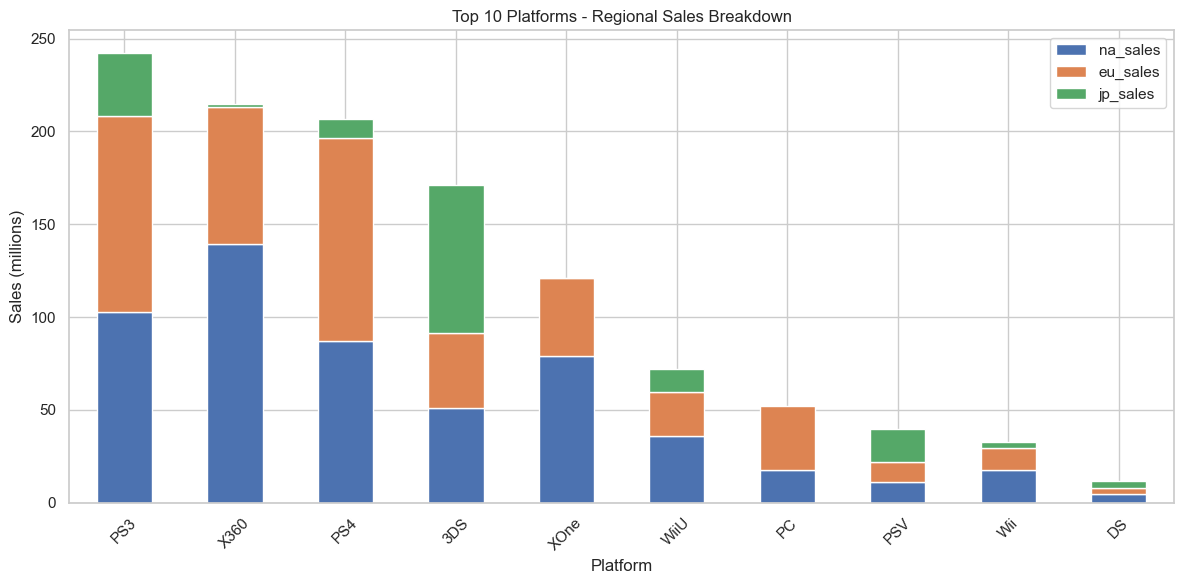

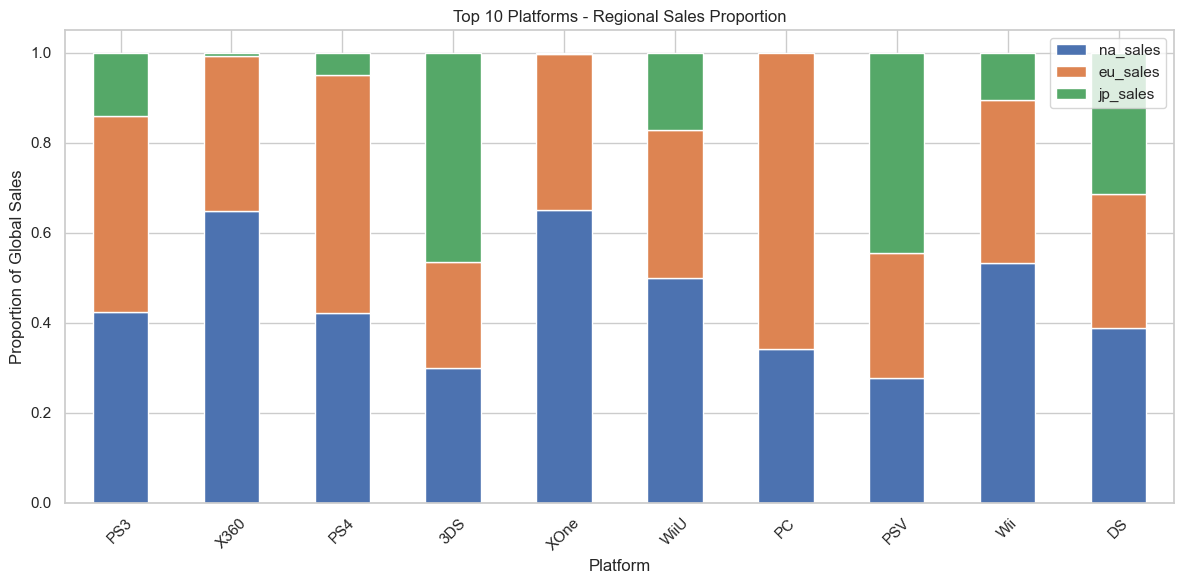

In [84]:
# Visualize cross-regional comparison for top platforms
platform_region_sales[['na_sales', 'eu_sales', 'jp_sales']].head(10).plot(
    kind='bar', stacked=True, figsize=(12, 6), title='Top 10 Platforms - Regional Sales Breakdown'
)
plt.ylabel('Sales (millions)')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot the normalized sales (percentage by region)
platform_region_normalized[['na_sales', 'eu_sales', 'jp_sales']].head(10).plot(
    kind='bar', stacked=True, figsize=(12, 6), title='Top 10 Platforms - Regional Sales Proportion'
)
plt.ylabel('Proportion of Global Sales')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌍 Regional Sales Summary (PS4, XOne, WiiU, PSP, PC)

#### 💿 Total Sales (in millions)
- **PS4**: 206.78M – Strongest in **Europe** (109.31M), followed by NA (87.25M), low in JP (10.22M)
- **XOne**: 121.14M – Heavily **NA-focused** (78.85M), decent in EU (41.96M), nearly absent in JP (0.33M)
- **WiiU**: 71.99M – Most balanced of the three: NA (36.00M), EU (23.65M), JP (12.34M)
- **PC**: 51.99M – Strong **EU bias** (34.23M), some NA presence (17.76M), **no JP sales reported**
- **PSP**: 11.02M – Overwhelmingly popular in **Japan** (10.47M), almost **no presence elsewhere**

#### 🔍 Key Insights
- **PS4** dominated in **Europe** with nearly 53% of its global sales.
- **XOne** was **NA-heavy**, making up 65% of its total.
- **WiiU** was the most **regionally balanced** among the three.
- **PC gaming** skewed toward **Europe**.
- **PSP** was practically a **Japan-exclusive** success during this period.
- Japan prefer **portable platforms and japanese market.** We definitely should **not** recommend them **XBox.**


## 4.2 Regional Genre Analysis

Now let's examine genre preferences across regions:

In [87]:
# Function to analyze genre performance across regions
def analyze_genre_performance(df):
    # Group by genre and sum regional sales
    genre_sales = df.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

    # Add total global sales
    genre_sales['global_sales'] = genre_sales.sum(axis=1)

    # Sort by global sales for easier comparison
    genre_sales = genre_sales.sort_values('global_sales', ascending=False)

    # Normalize sales to compare relative performance (optional)
    genre_sales_normalized = genre_sales.div(genre_sales['global_sales'], axis=0)

    return genre_sales, genre_sales_normalized


genre_sales, genre_sales_normalized = analyze_genre_performance(df_relevant)
genre_sales

,na_sales,eu_sales,jp_sales,global_sales
genre,,,,
Action,168.55,148.66,45.73,362.94
Shooter,128.53,97.57,8.17,234.27
Role-Playing,58.22,44.30,58.90,161.42
Sports,73.99,57.08,7.09,138.16
Misc,37.43,25.66,11.82,74.91
Platform,24.09,20.02,8.52,52.63
Racing,16.49,25.52,2.49,44.50
Fighting,17.95,9.45,8.69,36.09
Simulation,7.81,13.28,10.08,31.17


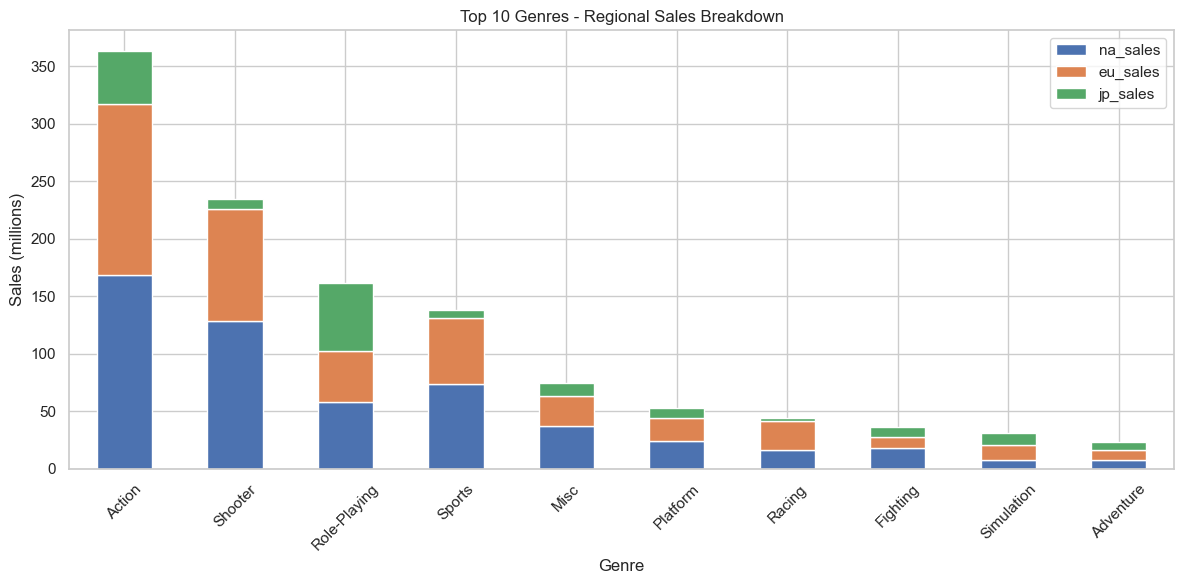

In [88]:
genre_sales[['na_sales', 'eu_sales', 'jp_sales']].head(10).plot(
    kind='bar', stacked=True, figsize=(12, 6), title='Top 10 Genres - Regional Sales Breakdown'
)
plt.ylabel('Sales (millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Cross-Regional Genre Comparison

Let's compare genre preferences across regions:

In [90]:
# Create a comparative genre analysis
genre_sales_normalized

,na_sales,eu_sales,jp_sales,global_sales
genre,,,,
Action,0.464402,0.409599,0.125999,1.0
Shooter,0.548640,0.416485,0.034874,1.0
Role-Playing,0.360674,0.274439,0.364887,1.0
Sports,0.535539,0.413144,0.051317,1.0
Misc,0.499666,0.342544,0.157789,1.0
Platform,0.457724,0.380391,0.161885,1.0
Racing,0.370562,0.573483,0.055955,1.0
Fighting,0.497368,0.261845,0.240787,1.0
Simulation,0.250561,0.426051,0.323388,1.0


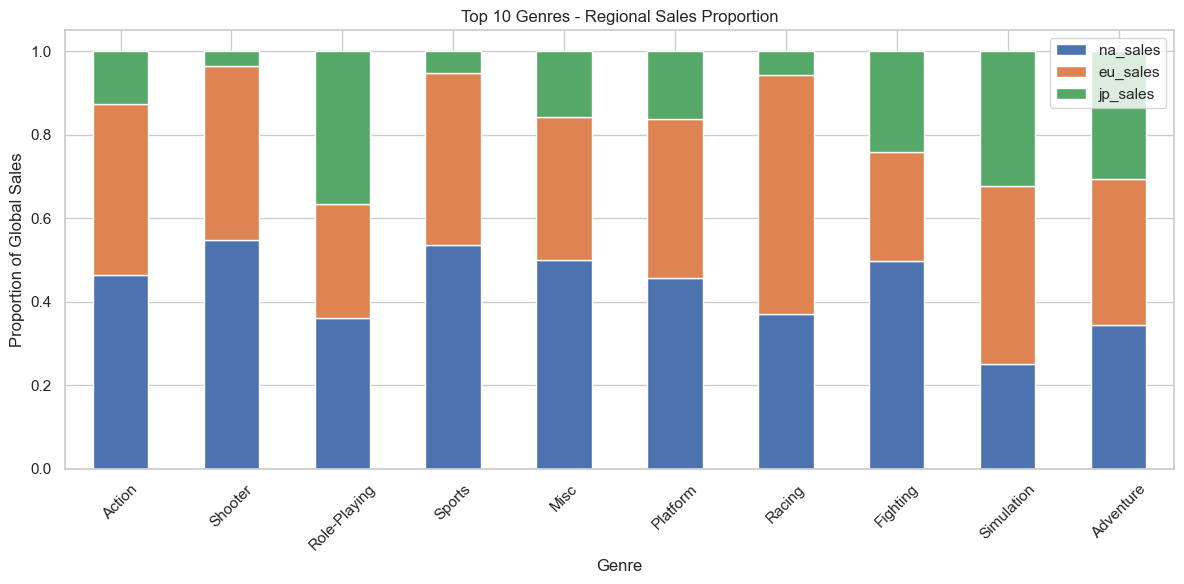

In [91]:
# Plot the genre sales (normalized values as proportions)
genre_sales_normalized[['na_sales', 'eu_sales', 'jp_sales']].head(10).plot(
    kind='bar', stacked=True, figsize=(12, 6), title='Top 10 Genres - Regional Sales Proportion'
)
plt.ylabel('Proportion of Global Sales')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 🎮 Regional Sales by Genre

#### 💿 Total Sales (in millions)
- **Action**: 362.94M – Most popular overall, led by **NA (168.55M)** and **EU (148.66M)**, modest in JP (45.73M)
- **Shooter**: 234.27M – Heavy **NA skew** (128.53M), strong EU sales (97.57M), minimal in JP (8.17M)
- **Role-Playing**: 161.42M – Most balanced genre: **JP (58.90M)** > NA (58.22M) ≈ EU (44.30M)
- **Sports**: 138.16M – Strongest in **NA (73.99M)** and EU (57.08M), low in JP (7.09M)
- **Misc**: 74.91M – Solid in NA and EU, with **16% from Japan**, more balanced than others in mid-tier

#### 📊 Market Share by Region
- **Action**: ~46% NA, 41% EU, 13% JP – Widely appealing in the West
- **Shooter**: ~55% NA – Least popular in Japan (3.5%)
- **Role-Playing**: ~36% Japan – One of the few genres with strong Japanese representation
- **Sports**: ~54% NA, 41% EU – Clear Western preference
- **Puzzle & Simulation**: Relatively niche globally, but **Puzzle** shows **strong Japanese appeal (46%)**

#### 🧠 Key Insights
- **Action and Shooter games** dominate globally, driven mostly by **Western markets**.
- **Role-Playing** stands out as the most **globally balanced** genre, especially popular in Japan.
- **Puzzle and Simulation** genres maintain **regional loyalty**, especially in **Japan and Europe**.


## 4.3 ESRB Rating Impact Analysis

Finally, let's examine how ESRB ratings affect sales in each region:

In [94]:
# Function to analyze ESRB rating impact
def analyze_rating_impact(df):

    # Group by rating and sum regional sales
    rating_sales = df.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales', ]].sum()

    # Add global sales column
    rating_sales['global_sales'] = rating_sales.sum(axis=1)

    # Sort by global sales
    rating_sales = rating_sales.sort_values('global_sales', ascending=False)

    # Normalize for proportion plot (optional)
    rating_sales_normalized = rating_sales.div(rating_sales['global_sales'], axis=0)

    return rating_sales, rating_sales_normalized
rating_sales, rating_sales_normalized = analyze_rating_impact(df_relevant)
rating_sales

,na_sales,eu_sales,jp_sales,global_sales
rating,,,,
M,215.90,177.42,20.00,413.32
unrated,94.78,84.03,94.52,273.33
E,106.40,99.42,27.26,233.08
E10+,71.89,51.56,7.74,131.19
T,57.18,43.22,23.82,124.22


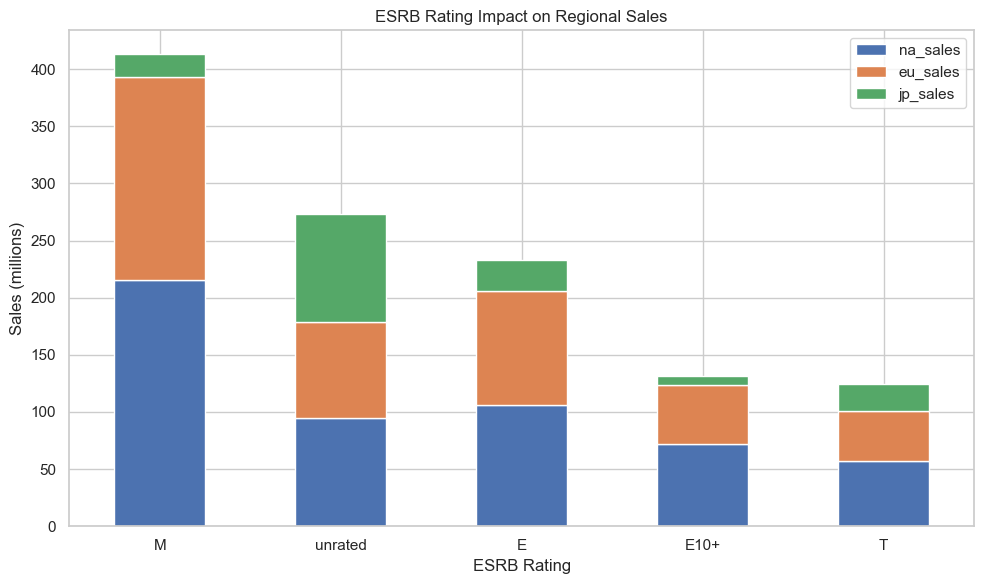

In [95]:
# Plot absolute sales by ESRB rating
rating_sales[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar', stacked=True, figsize=(10, 6),
    title='ESRB Rating Impact on Regional Sales'
)
plt.ylabel('Sales (millions)')
plt.xlabel('ESRB Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [96]:
# Analyze ESRB impact for each region
rating_sales_normalized

,na_sales,eu_sales,jp_sales,global_sales
rating,,,,
M,0.522356,0.429256,0.048389,1.0
unrated,0.346760,0.307431,0.345809,1.0
E,0.456496,0.426549,0.116956,1.0
E10+,0.547984,0.393018,0.058998,1.0
T,0.460312,0.347931,0.191757,1.0


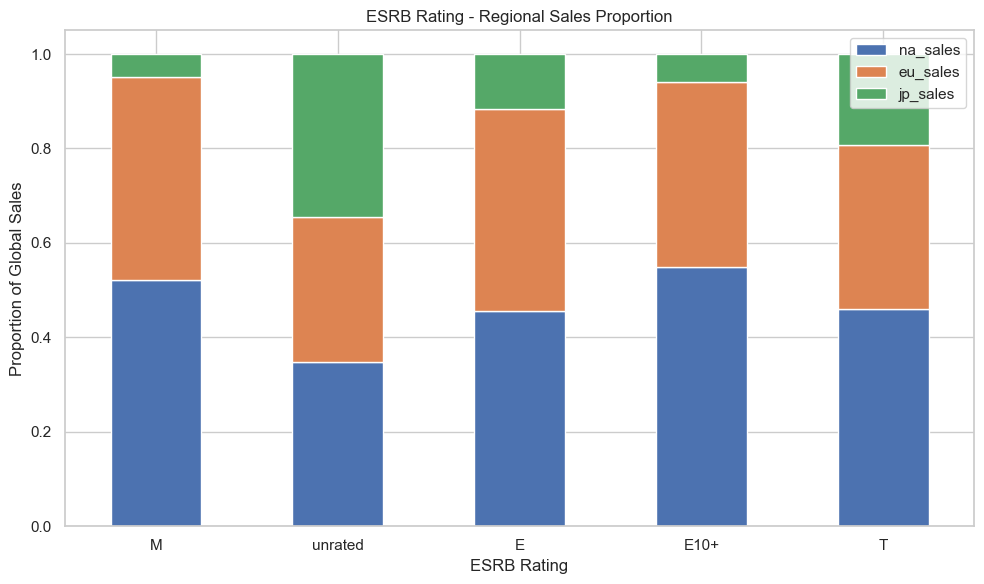

In [97]:
# Plot normalized sales (proportional by rating)
rating_sales_normalized[['na_sales', 'eu_sales', 'jp_sales']].plot(
    kind='bar', stacked=True, figsize=(10, 6),
    title='ESRB Rating - Regional Sales Proportion'
)
plt.ylabel('Proportion of Global Sales')
plt.xlabel('ESRB Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

#### 🏷️ Regional Sales by ESRB Rating

#### 💿 Total Sales (in millions)
- **M (Mature)**: 413.32M – Dominates globally, especially in **NA (215.90M)** and **EU (177.42M)**, minimal in JP (20M)
- **Unrated**: 273.33M – Balanced across regions with **strong JP support (94.52M)**
- **E (Everyone)**: 233.08M – Widely appealing in **NA (106.40M)** and EU (99.42M), moderate in JP (27.26M)
- **E10+**: 131.19M – Mostly Western success, led by **NA (71.89M)**
- **T (Teen)**: 124.22M – Relatively modest performance, with a more even spread (notably **23.82M in JP**)

#### 📊 Market Share by Region
- **Mature**: ~52% NA, ~43% EU – Clearly a Western audience focus
- **Unrated**: Most **evenly distributed** across NA (35%), EU (31%), and JP (34%)
- **Everyone (E)**: Skews Western (~88% NA+EU), only ~12% from JP
- **E10+**: ~55% NA, ~39% EU, only ~6% from JP
- **Teen (T)**: Slightly more global, but still **60% from NA & EU**

#### 🧠 Key Insights
- **M-rated games** dominate the market but are mostly driven by **Western sales**.
- **Unrated titles** have a **strong presence in Japan**, matching their Western impact – possibly due to regionally specific releases or legacy titles.
- **E-rated games** have **broad appeal**, while **E10+** and **T-rated games** are largely focused on North America.


# Step 5 : Hypothesis Tests

## 🎯 Claim 1: Average user ratings of Xbox One and PC platforms are the same

### ✅ Hypotheses
- **Null Hypothesis (H₀)**: The average user ratings for Xbox One and PC are equal.  
  \( H_0: \mu_{XOne} = \mu_{PC} \)

- **Alternative Hypothesis (H₁)**: The average user ratings for Xbox One and PC are different.  
  \( H_1: \mu_{XOne} \neq \mu_{PC} \)

### 🔍 Test Type
- **Two-sample independent t-test (Welch’s t-test)**
- **Why**: Comparing the means of two independent groups (Xbox One vs. PC), assuming unequal variances.

### 🧪 Assumptions
- User scores are approximately normally distributed (robust for large samples).
- Samples are independent.

### 🧾 Alpha Level
- α = 0.05

### 📌 Decision Rule
- If p-value < 0.05: Reject H₀ (significant difference)
- If p-value ≥ 0.05: Fail to reject H₀ (no significant difference)

---

## 🎯 Claim 2: Average user ratings for the Action and Sports genres are different

### ✅ Hypotheses
- **Null Hypothesis (H₀)**: The average user ratings for Action and Sports genres are equal.  
  \( H_0: \mu_{Action} = \mu_{Sports} \)

- **Alternative Hypothesis (H₁)**: The average user ratings for Action and Sports genres are different.  
  \( H_1: \mu_{Action} \neq \mu_{Sports} \)

### 🔍 Test Type
- **Two-sample independent t-test (Welch’s t-test)**
- **Why**: Comparing means between two independent genre groups (Action vs. Sports), with potentially unequal variances.

### 🧪 Assumptions
- Approximate normal distribution of user scores within genres.
- Independence of observations.

### 🧾 Alpha Level
- α = 0.05

### 📌 Decision Rule
- If p-value < 0.05: Reject H₀ (significant difference)
- If p-value ≥ 0.05: Fail to reject H₀ (no significant difference)



In [100]:
# Prepare the data
xbox_scores = df_relevant[df_relevant['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_relevant[df_relevant['platform'] == 'PC']['user_score'].dropna()

# Hypothesis: Average user ratings are equal between Xbox One and PC
# Test the hypotheses
alpha = 0.05
results = st.ttest_ind(xbox_scores, pc_scores, equal_var=False)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis at significance level: Average user ratings are different between Xbox One and PC.")
else:
    print("We can't reject the null hypothesis: No significant difference in average user ratings between Xbox One and PC.")


p-value: 0.9441751855931831
We can't reject the null hypothesis: No significant difference in average user ratings between Xbox One and PC.


In [101]:
# Prepare the data
action_scores = df_relevant[df_relevant['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_relevant[df_relevant['genre'] == 'Sports']['user_score'].dropna()

# Hypothesis: Average user ratings are equal between Action and Sports genres
# Test the hypotheses
alpha = 0.05
results = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis at significance level: Average user ratings are different between Action and Sports genres.")
else:
    print("We can't reject the null hypothesis: No significant difference in average user ratings between Action and Sports genres.")


p-value: 2.767130785663924e-18
We reject the null hypothesis at significance level: Average user ratings are different between Action and Sports genres.


# Step 6. Write a general conclusion


# ✅ Final Conclusions

This project investigates several aspects of video game performance data across different platforms, genres, and regions. We focused on understanding regional sales patterns, genre preferences, and the impact of ESRB ratings on game sales. Additionally, we conducted hypothesis testing to examine potential differences in user ratings between platforms and genres.

## 📊 Hypothesis Test Results

- **Xbox One vs. PC (User Ratings)**  
  - *p-value: 0.944*  
  - ✅ We **cannot reject the null hypothesis** – there's **no significant difference** in average user ratings between Xbox One and PC titles. This suggests that users generally rate games similarly across both platforms.

- **Action vs. Sports Genres (User Ratings)**  
  - *p-value: 2.77e-18*  
  - ❌ We **reject the null hypothesis** – there **is a significant difference** in average user ratings between Action and Sports games. This supports the earlier observation that **Action games show a wider performance gap**, with many underperforming titles bringing down the average despite high total sales.

## 📌 Reinforced Insights

- **Action Games** drive the highest global sales but show **high variance and low median sales**, indicating **more failures than successes**.
- **Shooter Games** display **consistent performance**, with high average and median sales across regions.
- **PS4 and Xbox One** dominate Western markets, while **PC skews European**, and **PSP maintains a niche presence in Japan**.
- In genres, **Role-Playing games** show strong **Japanese market** alignment, while **Sports and Shooters** remain favorites in **NA and EU**.
- By ESRB rating, **Mature (M)** games rule in the West, while **Unrated titles** show surprising strength in Japan.

Together, these insights paint a nuanced picture of the market—where high-volume genres or platforms don't always guarantee quality or consistency, and regional preferences continue to shape the success of games across the globe.
